<a href="https://colab.research.google.com/github/atul1994s/Global_Terrorism_Analysis_EDA/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name**    

<div style="text-align: center">

$\color{red}{\text{Global Terrorism Analysis}}$

</div>




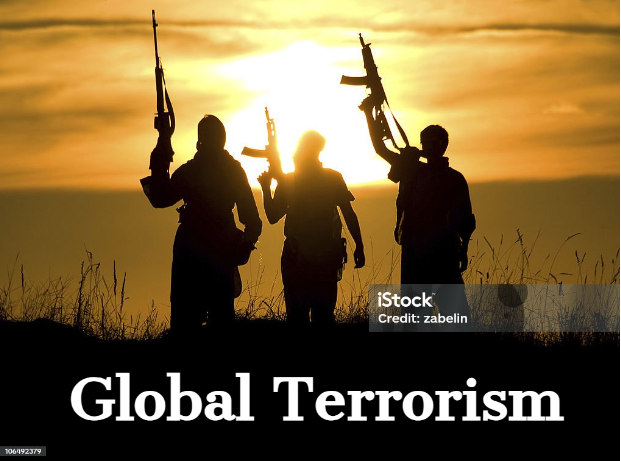

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member**-  $\color{yellow}{\text{Atul Singh}}$


# **Project Summary -**

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

**Data Preprocessing** :

1. Importing libraries
2. Importing datasets
3. Getting the dataset
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**

1. **ANALYSING GLOBAL TERROR EVENTS**
  
    1.1 Analysis based on Inclusion Criteria (crit1, crit2, crit3)
    1.2 Analysis based on target types
    1.3 Analysis based on Attack types
    1.4 Analysis based on weapon types

2. **ANALYSING GLOBAL TERROR EVENTS BY ORGANISATION**

3. **Analysising organisation with respect to criteria**
4. **Analysising most affected regions i.e, Middle East & North Africa and South Asia**


THE INFORMATION REGARDING COLOUMN SUCH AS COLOUMN DEFINITION AND EXPLANATION HAS BEEN TAKEN FROM [Global Terrorism Database (GTD) CODEBOOK: METHODOLOGY, INCLUSION CRITERIA, AND VARIABLES](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)









# **GitHub Link -**


Atul Singh :-https://github.com/atul1994s/Global_Terrorism_Analysis_EDA

# ***Let's Begin !***


#1. Data cleaning and finalising features

The GTD contains 135 columns and 181691 rows of data related to terror events from 1970 to 2017. So in this step, we will,

1. Eliminate unwanted columns
2. Comprehend the NaN values
3. Rename the column names for better understanding

In [2]:
#The following libraries are used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
from matplotlib_venn import venn3, venn3_circles

In [3]:
#Mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
raw_df=pd.read_csv('/content/drive/MyDrive/alma project/Module 2 GTD/Global Terrorism Data.csv',encoding='ISO-8859-1')

<ipython-input-4-7c2f5a755976>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df=pd.read_csv('/content/drive/MyDrive/alma project/Module 2 GTD/Global Terrorism Data.csv',encoding='ISO-8859-1')


In [5]:
#creating a copy of dataframe
gtdata=raw_df.copy()

In [6]:
#Analysing the type of coulmns
list(gtdata)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [7]:
#Comprehending the NaN values and filling it will required values
gtdata['country_txt'].fillna('Unknown',inplace=True)
gtdata['region_txt'].fillna('Unknown',inplace=True)
gtdata['city'].fillna('Unknown',inplace=True)
gtdata['provstate'].fillna('Unknown',inplace=True)
gtdata['nwoundte'].fillna(0,inplace=True)
gtdata['ransomamt'].fillna(0,inplace=True)
gtdata['ransompaid'].fillna(0,inplace=True)
gtdata['success'].fillna('Unknown',inplace=True)
gtdata['attacktype1_txt'].fillna('Unknown',inplace=True)
gtdata['targtype1_txt'].fillna('Unknown',inplace=True)
gtdata['gname'].fillna('Unknown',inplace=True)
gtdata['weaptype1_txt'].fillna('Unknown',inplace=True)
gtdata['nkill'].fillna(0,inplace=True)
gtdata['nwound'].fillna(0,inplace=True)
gtdata['propvalue'].fillna(0,inplace=True)
gtdata['property'].fillna(0,inplace=True)
gtdata['nkillter'].fillna(0,inplace=True)
gtdata['alternative_txt'].fillna('unknown',inplace=True)


In [8]:
#Eleminating columns with NaN values
na_coloumn=[]
for i in list(gtdata):
  if ((gtdata[i].isna().sum())*100/181691)>0:
    na_coloumn.append(i)
for i in na_coloumn:
   gtdata.drop(i, inplace=True, axis=1)

In [9]:
#Renaming the coloumn
gtdata.rename(columns={'iyear':'YEAR',
                           'imonth':'MONTH',
                           'iday':'DAY',
                           'country_txt':'COUNTRY',
                           'region_txt':'REGION',
                           'success':'SUCCESS',
                           'provstate':'STATE',
                           'attacktype1_txt':'ATTACK TYPE',
                           'targtype1_txt':'TARGET TYPE',
                           'gname':'ORGANISATION',
                           'weaptype1_txt':'WEAPON TYPE',
                           'nwound':'NO. OF WOUNDED',
                           'nkill':'NO. OF KILLED',
                           'property': 'PROPERTY',
                           'propvalue' :'PROP_VALUE',
                           'nwoundte':'CULPRIT WOUNDED',
                           'ransomamt':'RANSOM AMOUNT',
                           'ransompaid':'RANSOM AMOUNT PAID',
                           'nkillter':'CULPRIT KILLED',
                           'doubtterr':'DOUBT TERROR',
                           'dbsource':'DATA BASE SOURCE'},inplace=True)

In [10]:
#Creating new coloumns for total number of casualities and no. of attacks
gtdata['CASUALTY']=gtdata['NO. OF KILLED']+gtdata['NO. OF WOUNDED']
gtdata['No.of attacks']=gtdata['eventid']/gtdata['eventid']

In [11]:
#Finalised list of columns for further analysis
list(gtdata)

['eventid',
 'YEAR',
 'MONTH',
 'DAY',
 'extended',
 'country',
 'COUNTRY',
 'region',
 'REGION',
 'STATE',
 'city',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'alternative_txt',
 'SUCCESS',
 'suicide',
 'attacktype1',
 'ATTACK TYPE',
 'targtype1',
 'TARGET TYPE',
 'ORGANISATION',
 'individual',
 'weaptype1',
 'WEAPON TYPE',
 'NO. OF KILLED',
 'CULPRIT KILLED',
 'NO. OF WOUNDED',
 'CULPRIT WOUNDED',
 'PROPERTY',
 'PROP_VALUE',
 'RANSOM AMOUNT',
 'RANSOM AMOUNT PAID',
 'DATA BASE SOURCE',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY',
 'CASUALTY',
 'No.of attacks']

# **1. ANALYSING GLOBAL TERROR EVENTS**

Here we will analyse terror situations at global scale

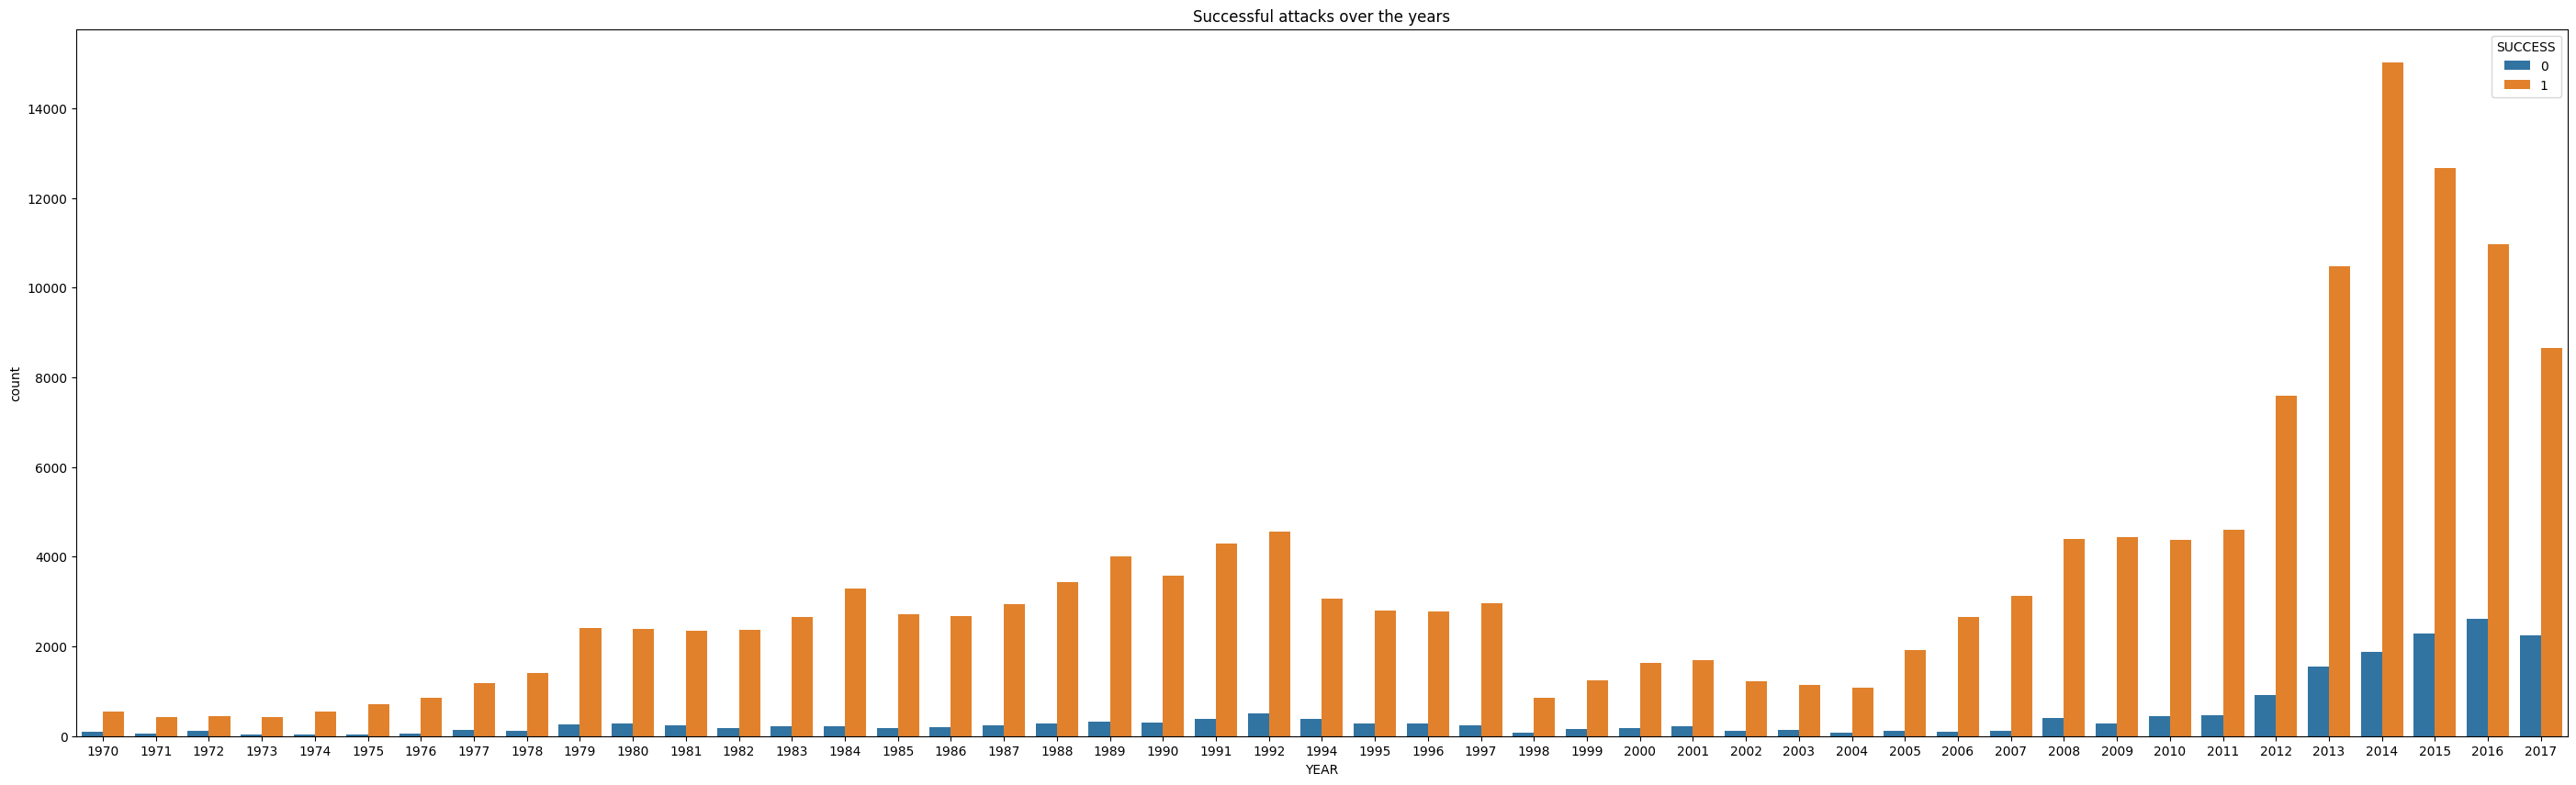

In [12]:
#Visualisation of number of attacks per year country wise
total_attacks=px.choropleth( gtdata.groupby(['YEAR','COUNTRY'])['No.of attacks'].count().reset_index(),locations='COUNTRY',locationmode='country names',color='No.of attacks', hover_name='COUNTRY',
                            title='NUMBER OF ATTACKS PER YEAR(1970-2017)',
                            color_continuous_scale = px.colors.sequential.Electric,
                            animation_frame='YEAR')
total_attacks.show()



#Visualisation of total number of casualities country wise
total_casuality=px.choropleth( gtdata.groupby('COUNTRY')['CASUALTY'].sum().reset_index(),locations='COUNTRY',locationmode='country names',color='CASUALTY',
                            hover_name='COUNTRY',
                            title='TOTAL NUMBER OF CASUALITIES(1970-2017)',
                            color_continuous_scale = px.colors.sequential.Electric )
total_casuality.show()


#Count plot on Succesful VS unsuccesful attacks over the years
plt.figure(figsize=(35, 10))
sns.countplot(x='YEAR',hue='SUCCESS',data=gtdata)
plt.title('Successful attacks over the years')
plt.show()



#Line plot on region wise number of attacks and
Region_wise=px.line(data_frame=pd.merge(gtdata.groupby('REGION')['CASUALTY'].sum().reset_index(), gtdata.groupby('REGION')['No.of attacks'].count().reset_index(), how='inner').sort_values('No.of attacks',ascending=False)
                    ,y=['No.of attacks','CASUALTY'],x='REGION',title='REGION WISE NUNMBER OF ATTACKS AND CASUALITIES')
Region_wise.show()
#Treemap visualisation affected countries in terms of number of attack
treemap_country_wise=px.treemap(data_frame=gtdata,
                     values='CASUALTY',
                     path=['COUNTRY','STATE'],
                     color_discrete_sequence=px.colors.sequential.Electric_r,
                     title='Treemap based on country and state in terms of number of casualities',)
treemap_country_wise.show()

In [13]:

#Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events
C_W_attacks=gtdata.groupby('REGION')['No.of attacks'].count().sort_values(ascending=False).reset_index()
C_W_attacks['percentage']=round(C_W_attacks ['No.of attacks']*100 / 181691,2)
tot_row_re = pd.DataFrame(C_W_attacks.head(2).sum()).T
tot_row_re['REGION'] = 'TOTAL'
print('Top 2 regions affected by terrorism which in a way constituted 50% of total events')
dr=pd.concat([C_W_attacks.head(2), tot_row_re]).reset_index(drop=True)
dr.index=dr.index+1
dr

Top 2 regions affected by terrorism which in a way constituted 50% of total events


REGION No.of attacks percentage
1  Middle East & North Africa         50474      27.78
2                  South Asia         44974      24.75
3                       TOTAL         95448      52.53

In [14]:
#Dataframe of top 10 countries affected by terrorism which in a way constituted 50% of total events
C_W_attacks=gtdata.groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index()
C_W_attacks.head(10)
C_W_attacks['percentage']=round(C_W_attacks ['No.of attacks']*100 / 181691,2)
tot_row = pd.DataFrame(C_W_attacks.head(8).sum()).T
tot_row['COUNTRY'] = 'TOTAL'
print('Top 10 countries affected by terrorism which in a way constituted 50% of total events')
result=pd.concat([C_W_attacks.head(10), tot_row]).reset_index(drop=True)
result.index=result.index+1
result

Top 10 countries affected by terrorism which in a way constituted 50% of total events


COUNTRY No.of attacks percentage
1             Iraq         24636      13.56
2         Pakistan         14368       7.91
3      Afghanistan         12731       7.01
4            India         11960       6.58
5         Colombia          8306       4.57
6      Philippines          6908        3.8
7             Peru          6096       3.36
8      El Salvador          5320       2.93
9   United Kingdom          5235       2.88
10          Turkey          4292       2.36
11           TOTAL         90325      49.72


 From 1970 to 2017 50% of total events happened in the Middle East, North Africa and South Asia

 the top 10 countries in terms of the number of events constituted 50% of total events with Iraq 13%


In [15]:
# Creating year wise stats data frame
temp=gtdata.groupby('YEAR')['No.of attacks'].count().reset_index()#creating a temp dataframe
df_global=temp.iloc[1: , :].reset_index()
df_global['previous year']=temp['No.of attacks']
df_global['PERCENTAGE CHANGE']=(df_global['No.of attacks']-df_global['previous year'])*100/df_global['previous year']
a=df_global['PERCENTAGE CHANGE'].sum()/df_global['PERCENTAGE CHANGE'].count() #Average percentage change
print(f'The average percentage change is {round(a, 2)}')

df_global['YEAR'] = df_global["YEAR"].map(str)#Changing year to string for making all year visible

# Creating year wise stats pertaining to for all the above three
change_wise=px.bar(data_frame=df_global,y=['PERCENTAGE CHANGE'],x='YEAR',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS',text=df_global['PERCENTAGE CHANGE'].apply(lambda x: f'{round(x, 2)}%'))
change_wise.show()
a=df_global.tail(3)['PERCENTAGE CHANGE'].mean() #Average percentage change last 3 years


print(f'The average percentage for last three years is {round(a,2)}')

The average percentage change is 10.46


The average percentage for last three years is -13.48


•	The year 2014 witnessed the highest events as of now.

•	The year 1979 had the highest percentage change of 74.5%followed by 2005 (73%) and 2012(69%).

•	The year 1998 had the lowest percentage change of -71%.

•	The average percentage change is 10.5%.


# ***1.1 Analysis based on Inclusion Criteria (crit1, crit2, crit3)***

  These variables record which of the inclusion criteria (in addition to the necessary criteria) are met. This allows users to filter out those incidents whose inclusion was based on a criterion which they believe does not constitute terrorism proper. Note that for each of the criteria variables a case is coded as “1” if source information indicates that the criterion is met and “0” if source information indicates that the criterion is not met or that there is no indication that it is met.

***Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)***

The violent act must be aimed at attaining a political, economic, religious, or social goal.
This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure
profit motive or from an idiosyncratic personal motive unconnected with broader
societal change.

1 = "Yes" The incident meets Criterion 1.

0 = "No" The incident does not meet Criterion 1 or there is no indication that the
incident meets Criterion 1.

***Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)
(CRIT2)***

To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or
convey some other message to a larger audience (or audiences) than the immediate
victims. Such evidence can include (but is not limited to) the following: pre- or postattack statements by the perpetrator(s), past behavior by the perpetrators, or the
particular nature of the target/victim, weapon, or attack type.

1 = "Yes" The incident meets Criterion 2.

0 = "No" The incident does not meet Criterion 2 or no indication.

***Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)***

The action is outside the context of legitimate warfare activities, insofar as it targets
non-combatants (i.e. the act must be outside the parameters permitted by international
humanitarian law as reflected in the Additional Protocol to the Geneva Conventions of
12 August 1949 and elsewhere).

1 = "Yes" The incident meets Criterion 3.

0 = "No" The incident does not meet Criterion 3.


criteria 1 percentage =99.54    
criteria 2 percentage =100.0   
criteria 3 percentage =88.18


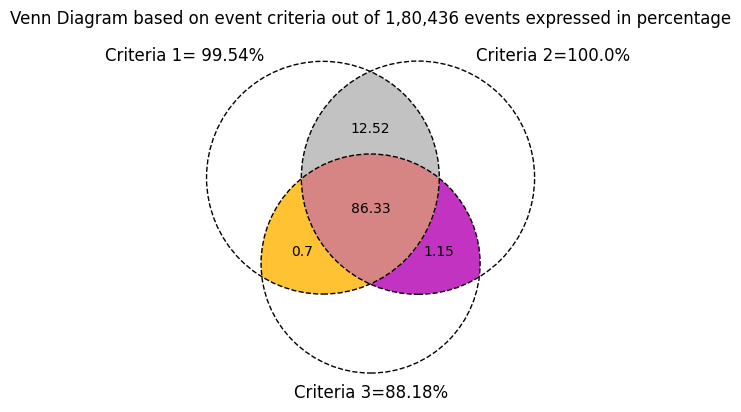

In [16]:
#COUNT PERCENTAGE OF WHICH FALLS UNDER CRITERIA 1
crit1=round(gtdata[(gtdata.crit1==1)]['eventid'].count()*100/180436,2)

#COUNT PERCENTAGE OF WHICH FALLS UNDER CRITERIA 2
crit2=round(gtdata[(gtdata.crit2==1)]['eventid'].count()*100/180436,2)

#count PERCENTAGE OF WHICH FALLS UNDER CRITERIA 3
crit3=round(gtdata[(gtdata.crit3==1)]['eventid'].count()*100/180436,2)

print(f'criteria 1 percentage ={crit1}    \ncriteria 2 percentage ={crit2}   \ncriteria 3 percentage ={crit3}')


#COUNT PERCENTAGE OF WHICH FALLS UNDER ALL CRITERIA
all_crit=round(gtdata[(gtdata.crit1==1) & (gtdata.crit2==1) & (gtdata.crit3==1)]['eventid'].count()*100/180436,2)
all_crit


#COUNT PERCENTAGE OF WHICH FALLS UNDER CRITERIA 1 & CRITERIA 2
crit_1_2=round(gtdata[(gtdata.crit1==1) & (gtdata.crit2==1) & (gtdata.crit3==0)]['eventid'].count()*100/180436,2)

#COUNT PERCENTAGE OF WHICH FALLS UNDER CRITERIA 1 & CRITERIA 3
crit_1_3=round(gtdata[(gtdata.crit1==1) & (gtdata.crit3==1) & (gtdata.crit2==0)]['eventid'].count()*100/180436,2)

#COUNT PERCENTAGE OF WHICH FALLS UNDER CRITERIA 2 & CRITERIA 3
crit_2_3=round(gtdata[(gtdata.crit2==1) & (gtdata.crit3==1) & (gtdata.crit1==0)]['eventid'].count()*100/180436,2)


#preparation of venn diagram
v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,all_crit),
      set_labels=('Criteria 1= 99.54%', 'Criteria 2=100.0%', 'Criteria 3=88.18%'),
      set_colors=("Yellow", "blue", "red"), alpha=0.8)
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,all_crit),
              linestyle="dashed", linewidth=1)
plt.title("Venn Diagram based on event criteria out of 1,80,436 events expressed in percentage")

plt.show()

Considering event inclusion criteria, 99.54% of events aimed at attaining a political, economic, religious, or social goal with an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims.

And moreover 86% of events had all the criteria followed.


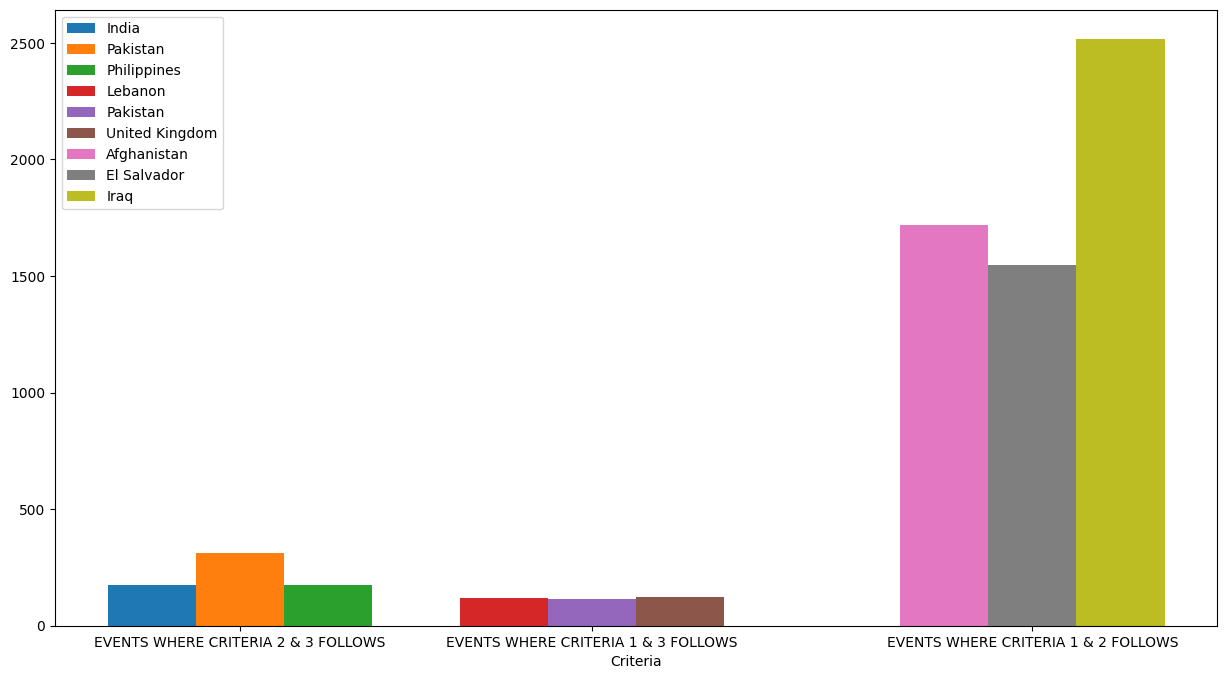

<Axes: xlabel='Criteria'>

<Figure size 1500x800 with 0 Axes>

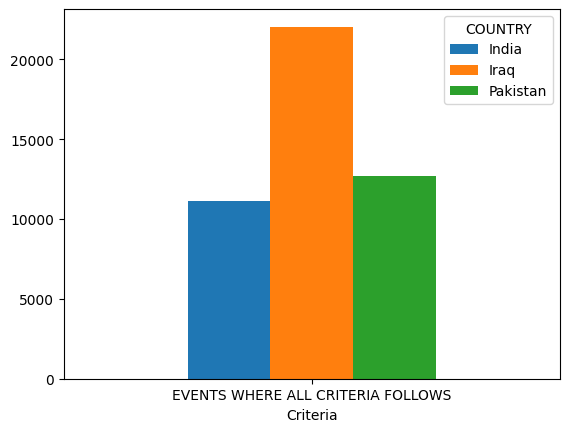

In [17]:
crit2_3_top3=gtdata[(gtdata.crit1==0) & (gtdata.crit2==1) & (gtdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(3)
crit1_3_top3=gtdata[(gtdata.crit1==1) & (gtdata.crit2==0) & (gtdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(3)
crit1_2_top3=gtdata[(gtdata.crit1==1) & (gtdata.crit2==1) & (gtdata.crit3==0)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(3)
all_crit_top3=gtdata[(gtdata.crit1==1) & (gtdata.crit2==1) & (gtdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(3)
crit2_3_top3['Criteria']=0
crit1_3_top3['Criteria']=1
crit1_2_top3['Criteria']=2
all_crit_top3['Criteria']='EVENTS WHERE ALL CRITERIA FOLLOWS'
ty=pd.concat([crit2_3_top3, crit1_3_top3, crit1_2_top3])
ty=ty.pivot_table(index='Criteria',columns='COUNTRY')
ty.columns = ty.columns.droplevel()
ty=ty.reset_index()
fig = plt.figure(figsize=(15, 8))

#creating multi bar gragh while avaoiding NaN values
# width of bars
width = 1
# create emptly lists for x tick positions and names
x_ticks_pos = []
# counter for helping with x tick positions
count = 0
# go through each row of the dataframe
for idx, row in ty.iterrows():
    # this will be the first bar position for this row
    count += idx
    # this will be the start of the first bar for this row
    start_idx = count - width / 2
    # this will be the end of the last bar for this row
    end_idx = start_idx
    # for each column in the wanted columns,
    # if the row is not null,
    # add the bar to the plot
    # also update the end position of the bars for this row
    for column in ty.drop(["Criteria"], axis=1).columns:
      if row[column] == row[column]:
            klm=plt.bar(count, row[column], width=width, label=column)
            count += 1
            end_idx += width
    # this checks if the row had any not NULL value in the desired columns
    # in other words, it checks if there was any bar for this row
    # if yes, add the center of all the row's bars and the row's name (A,B,C) to the respective lists
    if end_idx != start_idx:
        x_ticks_pos.append((end_idx + start_idx) / 2)
# now set the x_ticks
x_ticks = ['EVENTS WHERE CRITERIA 2 & 3 FOLLOWS', 'EVENTS WHERE CRITERIA 1 & 3 FOLLOWS', 'EVENTS WHERE CRITERIA 1 & 2 FOLLOWS']
plt.xticks(x_ticks_pos, x_ticks)
# plot the legends
plt.xlabel('Criteria')
plt.legend()
plt.show()
plt.figure(figsize=(15, 8))
bn=all_crit_top3.pivot_table(index='Criteria',columns='COUNTRY')
bn.columns = bn.columns.droplevel()
bn.plot.bar(rot=0)


# **1.2 Analysis based on target types**

In [75]:
#pie chart on target type
target_type_piechart=px.pie(gtdata.groupby('TARGET TYPE')['No.of attacks'].count().reset_index(),
          values='No.of attacks',
          names='TARGET TYPE',
          title='Attacks Percentage by target type')
target_type_piechart.show()

REMARKS:

Private citizens, property, military, police, government and business constitute 75% of the total


In [19]:
#Treemap visualisation of target types and country with respect to number of attacks
treemap_target_type=px.treemap(data_frame=gtdata,
                     values='No.of attacks',
                     path=['TARGET TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target types and country in terms of number of attacks',)
treemap_target_type.show()

#Treemap visualisation of organisation interms of target types with respect to number of casualities
treemap_target_type1=px.treemap(data_frame=gtdata,
                     values='CASUALTY',
                     path=['TARGET TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target types and country in terms of number of attacks',)
treemap_target_type1.show()

REMARKS:

Private citizen & property of Iraq, Nigeria and USA are the most affected

Military of Iraq, Afghanistan and El Salvador are most affected

Police of Iraq, Afghanistan and India are most affected

Business of Iraq, Pakistan and India are most affected

Government of Iraq Afghanistan and Pakistan are most affected

# **1.3 Analysis based on Attack types**

In [20]:
#pie chart on attack type
attack_type_piechart=px.pie(gtdata.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(),
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Analysis of Attacks by Type')
attack_type_piechart.show()

REMARKS:

Most preferred attack type is bombing/Explosion 49 % followed by armed assault 23.5 %

In [79]:
#Creating dataframe based on attack type
ATTACK_TYPE_data=gtdata.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index()
ATTACK_TYPE_data_success=gtdata.groupby('ATTACK TYPE')['SUCCESS'].sum().reset_index()
ATTACK_TYPE_data_casualty=gtdata.groupby('ATTACK TYPE')['CASUALTY'].sum().reset_index()
ATTACK_TYPE_data['SUCCESS']=ATTACK_TYPE_data_success.SUCCESS
ATTACK_TYPE_data['CASUALTY']=ATTACK_TYPE_data_casualty.CASUALTY
ATTACK_TYPE_data['PERCENTAGE']=round(ATTACK_TYPE_data['SUCCESS']*100/ATTACK_TYPE_data['No.of attacks'],2)
ATTACK_TYPE_data.sort_values(by='No.of attacks',ascending=False)
d= ATTACK_TYPE_data.sort_values(by='PERCENTAGE',ascending=False).reset_index(drop=True)
d.index=d.index+1
display(d)
#Creating bar graph from above dataframe
px.bar(data_frame=ATTACK_TYPE_data.sort_values(by='PERCENTAGE',ascending=False),

                  x='PERCENTAGE',y='ATTACK TYPE',
                  hover_data=['CASUALTY'],color='PERCENTAGE',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ATTACK TYPE AND THERE SUCCESS PERCENTAGE')

ATTACK TYPE  No.of attacks  SUCCESS  CASUALTY  \
1  Hostage Taking (Barricade Incident)            991      983    8444.0   
2          Hostage Taking (Kidnapping)          11158    10907   30677.0   
3                        Armed Assault          42669    40345  237663.0   
4       Facility/Infrastructure Attack          10356     9779    7407.0   
5                            Hijacking            659      579   20719.0   
6                    Bombing/Explosion          88255    77530  530007.0   
7                      Unarmed Assault           1015      879   14907.0   
8                              Unknown           7276     6015   47106.0   
9                        Assassination          19312    14615   38807.0   

   PERCENTAGE  
1       99.19  
2       97.75  
3       94.55  
4       94.43  
5       87.86  
6       87.85  
7       86.60  
8       82.67  
9       75.68

REMARKS:

Hostage Taking (Barricade Incident) had the highest success rate of 99 % and assassination had the lowest success rate of 75.7 %

In [22]:
#Treemap visualisation of attack types and country with respect to number of attacks
treemap_attack_type=px.treemap(data_frame=gtdata,
                     values='No.of attacks',
                     path=['ATTACK TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Electric_r,
                     title='Global Distribution of Attacks by Type and Country',)
treemap_attack_type.show()
#Treemap visualisation of organisation interms of attack types with respect to number of casualities
treemap_attack_type1=px.treemap(data_frame=gtdata,
                     values='CASUALTY',
                     path=['ATTACK TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Electric_r,
                     title='Global Impact of Attacks: Casualties by Type and Country',)
treemap_attack_type1.show()


# **1.4 Analysis based on weapon types**

In [23]:
#pie chart on weapon type
attack_type_piechart=px.pie(gtdata.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(),
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Weaponry Analysis: Total Incidents by Weapon Type')
attack_type_piechart.show()

REMARKS:
•	Explosives is the most preferred weapon type which constituted 51% followed by firearms 32%

In [24]:
#Creating dataframe based on weapon type
WEAPON_TYPE_data=gtdata.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index()
WEAPON_TYPE_data_success=gtdata.groupby('WEAPON TYPE')['SUCCESS'].sum().reset_index()
WEAPON_TYPE_data_casualty=gtdata.groupby('WEAPON TYPE')['CASUALTY'].sum().reset_index()
WEAPON_TYPE_data['SUCCESS']=WEAPON_TYPE_data_success.SUCCESS
WEAPON_TYPE_data['CASUALTY']=WEAPON_TYPE_data_casualty.CASUALTY
WEAPON_TYPE_data['PERCENTAGE']=round(WEAPON_TYPE_data['SUCCESS']*100/WEAPON_TYPE_data['No.of attacks'],2)
WEAPON_TYPE_data.sort_values(by='No.of attacks',ascending=False)
d=WEAPON_TYPE_data.sort_values(by='PERCENTAGE',ascending=False).reset_index(drop=True)
d.index+=1
display(d)
#Creating bar graph w.r.t weapon type
px.bar(data_frame=WEAPON_TYPE_data.sort_values(by='PERCENTAGE',ascending=False),
                  x='PERCENTAGE',y='WEAPON TYPE',
                  hover_data=['CASUALTY'],color='PERCENTAGE',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Weapon Effectiveness: Success Rates by Weapon Type')

WEAPON TYPE  No.of attacks  SUCCESS  \
1                                  Sabotage Equipment            141      133   
2                                          Incendiary          11135    10472   
3                                            Firearms          58524    54090   
4                                               Melee           3655     3286   
5                                             Unknown          15157    13420   
6                                          Explosives          92426    79746   
7   Vehicle (not to include vehicle-borne explosiv...            136      117   
8                                               Other            114       90   
9                                            Chemical            321      243   
10                                       Fake Weapons             33       18   
11                                         Biological             35       15   
12                                       Radiological             14        2   

    CASUALTY  PERCENTAGE  
1      369.0       94.33  
2    11006.0       94.05  
3   252113.0       92.42  
4    16070.0       89.90  
5    60195.0       88.54  
6   560181.0       86.28  
7    20305.0       86.03  
8      228.0       78.95  
9    14449.0       75.70  
10       1.0       54.55  
11     814.0       42.86  
12       6.0       14.29

REMARKS:

•	Sabotage equipment out of 141 attacks and incendiary out of 11135 attacks had the highest success rate of 94%.

In [25]:
#Treemap visualisation of weapon types and country with respect to number of attacks
treemap_weapon_type=px.treemap(data_frame=gtdata,
                     values='No.of attacks',
                     path=['WEAPON TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Global Impact of Weaponry: Attacks by Weapon Type and Country',)
treemap_weapon_type.show()

#Treemap visualisation of organisation interms of weapon types with respect to number of casualities
treemap_weapon_type1=px.treemap(data_frame=gtdata,
                     values='CASUALTY',
                     path=['WEAPON TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Global Impact of Weapons: Casualties by Weapon Type and Country',)
treemap_weapon_type1.show()


REMARKS:

In case of Explosives Iraq had highest number of attacks and casualties

In case of firearms pakistan had highest number of attacks and Afghanistan had highest number of casualties

In case of incendiary India had highest number of attacks and Iraq had highest number of casualties

In case of vehicle West Bank and Gaza strip had highest attacks and USA had highest number of casualties

# **2. ANALYSING GLOBAL TERROR EVENTS BY ORGANISATION**

In [26]:
organisation_data=gtdata.groupby('ORGANISATION')['No.of attacks'].count().reset_index()#Creating dataframe for each oraganisation and corresponding number of attacks
organisation_data['Attack successful']=gtdata.groupby('ORGANISATION')['SUCCESS'].sum().reset_index()['SUCCESS']#Creating coloumn of successfull number of attacks
organisation_data['No.of attacks percentage']=organisation_data['No.of attacks']*100/gtdata['No.of attacks'].count()#Creating coloumn  number of attacks percentage
organisation_data['Success percentage']=organisation_data['Attack successful']*100/organisation_data['No.of attacks']#Creating coloumn of successfull number of attacks percentage
organisation_data['CASUALTIES']=gtdata.groupby('ORGANISATION')['CASUALTY'].sum().reset_index()['CASUALTY']#Creating coloumn of  number of casualty
organisation_data['CASUALTIES PERCENTAGE']=organisation_data['CASUALTIES']*100/gtdata['CASUALTY'].sum()#Creating coloumn of  casualty percentage
organisation_data['Casuality to Attack ratio']=organisation_data['CASUALTIES']/organisation_data['No.of attacks']#Creating coloumn of  casualty to attack ratio
lj=organisation_data.sort_values(by='No.of attacks percentage',ascending=False)#creating a temp dataframe for further use

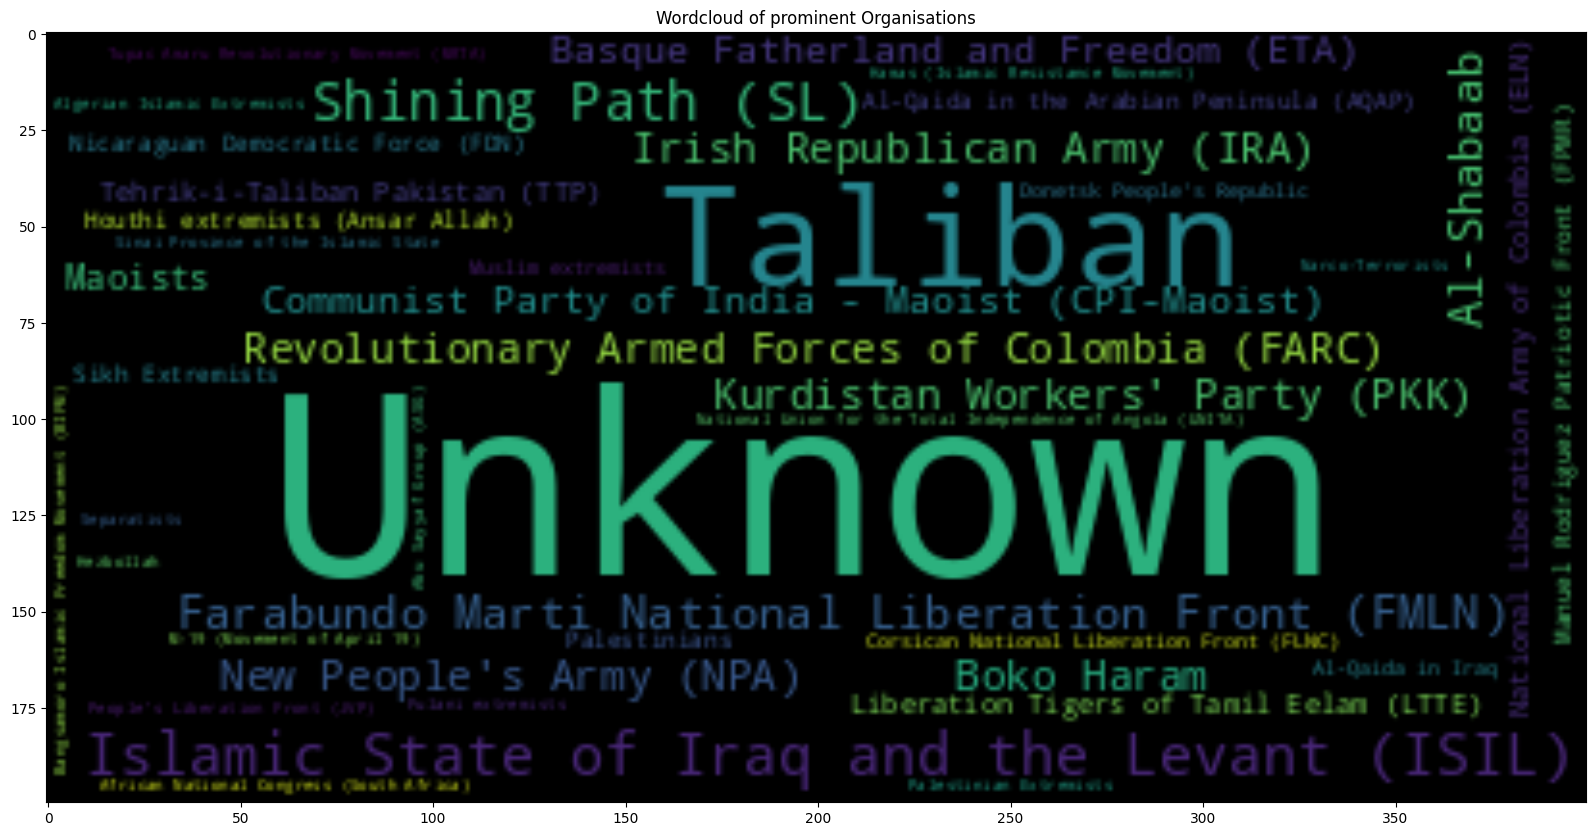

In [27]:
#creating world cloud of organisations
global_organisation_dict={}
for group,attacks in zip(organisation_data.ORGANISATION,organisation_data['No.of attacks']):
  global_organisation_dict[group]=attacks
wordcloud = WordCloud(background_color='black',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict) #using the dictionary created earlier
plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud of prominent Organisations')
plt.axis("on")
plt.show()

Here analysis was made on events based on the organizations involved giving weightage to the number of attacks. The organization behind 45% of the events is registered as unknown so further analysis was made on the remaining 55%, below mentioned are some of the key findings and visualizations,

In [28]:
#top 10 organisation without excluding unkown
top_10_organisation=lj[lj.ORGANISATION!='Unknown'].sort_values(by='No.of attacks',ascending=False).head(10).reset_index(drop=True)
top_10_organisation.index=top_10_organisation.index+1

display(top_10_organisation)

ORGANISATION  No.of attacks  \
1                                            Taliban           7478   
2        Islamic State of Iraq and the Levant (ISIL)           5613   
3                                  Shining Path (SL)           4555   
4   Farabundo Marti National Liberation Front (FMLN)           3351   
5                                         Al-Shabaab           3288   
6                            New People's Army (NPA)           2772   
7                        Irish Republican Army (IRA)           2671   
8      Revolutionary Armed Forces of Colombia (FARC)           2487   
9                                         Boko Haram           2418   
10                    Kurdistan Workers' Party (PKK)           2310   

    Attack successful  No.of attacks percentage  Success percentage  \
1                6680                  4.115779           89.328698   
2                4759                  3.089311           84.785320   
3                4337                  2.507004           95.214050   
4                3317                  1.844340           98.985377   
5                3016                  1.809666           91.727494   
6                2457                  1.525667           88.636364   
7                2282                  1.470078           85.436166   
8                2302                  1.368807           92.561319   
9                2247                  1.330831           92.928040   
10               2175                  1.271389           94.155844   

    CASUALTIES  CASUALTIES PERCENTAGE  Casuality to Attack ratio  
1      57342.0               6.128004                   7.668093  
2      69595.0               7.437453                  12.398895  
3      14632.0               1.563687                   3.212294  
4      12130.0               1.296304                   3.619815  
5      16954.0               1.811834                   5.156326  
6       7719.0               0.824911                   2.784632  
7       5462.0               0.583711                   2.044927  
8      10015.0               1.070279                   4.026940  
9      29801.0               3.184762                  12.324648  
10      9863.0               1.054035                   4.269697

In [29]:
#Treemap based on organisation and country  in terms of number of attacks
treemap=px.treemap(data_frame=gtdata[gtdata.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Global Analysis: Attacks by Organization and Country',)
treemap.show()


#Treemap based on Country and organisation in terms of number of attacks
treemap=px.treemap(data_frame=gtdata[gtdata.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['COUNTRY','ORGANISATION',],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Global Incidents: Attacks by Country and Organization',)
treemap.show()

REMARKS:

•	The organization with the most number of attacks is the Taliban at 4% of total events.

•	The organization with the most number of casualties is the ISIL at 7.5% of total casualties

•	LTTE had highest casualty to attack ratio of 13


In [80]:
#Treemap based on target type and organisation in terms of number of attacks
treemap=px.treemap(data_frame=gtdata[gtdata.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['TARGET TYPE','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Attacks by Target Type and Organization')
treemap.show()

REMARKS:

Private citizen & property is mostly targetted by ISIL

Military is mostly targetted by Taliban

Police is mostly targetted by Taliban

Business is mostly targetted by SL

Government is mostly targetted by Taliban

In [31]:
#Creating dataframe top 20 countries in terms of organizations within it
Temp=gtdata.groupby(['COUNTRY','ORGANISATION'])['No.of attacks'].sum().reset_index()
org_within_country=Temp.groupby('COUNTRY')['ORGANISATION'].count().reset_index()
org_within_country['No.of attacks']=gtdata.groupby(['COUNTRY'])['No.of attacks'].sum().reset_index()['No.of attacks']

#Bar graph of top 20 countries in terms of organizations within it
px.bar(data_frame=org_within_country.sort_values(by='ORGANISATION', ascending=False).head(20),
                  width=1150,height=750,
                  x='ORGANISATION',y='COUNTRY',
                  hover_data=['No.of attacks'],color='ORGANISATION',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='TOP 20 COUNTRIES ATTACKS BY ORGANISATION ')

REMARKS:

India had most number of organisation within it with 301 organisations followed by USA with 234

In [32]:
#TOP 20 ORGANISATION IN TERMS OF NUMBER OF COUNTRIES ATTACKED WITH RESPECT TO NUMBER OF ATTACKS
temp=gtdata[gtdata.ORGANISATION!='Unknown'].groupby(['ORGANISATION','COUNTRY'])['No.of attacks'].count().reset_index()
country_within_org=temp.groupby(['ORGANISATION'])['COUNTRY'].count().reset_index()
country_within_org['No.of attacks']=gtdata.groupby(['ORGANISATION'])['No.of attacks'].count().reset_index()['No.of attacks']


#Bar graph of top 20 organizations in terms of number of countries attacked
px.bar(data_frame=country_within_org.sort_values(by='COUNTRY',ascending=False).head(20),
                  width=1150,height=800,
                  x='COUNTRY',y='ORGANISATION',
                  hover_data=['No.of attacks'],color='COUNTRY',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title=' Top 20 Organizations by Countries Targeted')

REMARKS:

•	The organization which attacked most countries is Muslim Extremist (51 countries)

In [33]:
#Treemap based on attack type and organisation in terms of number of attacks
treemap=px.treemap(data_frame=gtdata[gtdata.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['ATTACK TYPE','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Electric_r,
           title='Attack type by organisation')
treemap.show()

REMARKS:

In case of bombing/Explosion, ISIL had highest number of attacks.

In case of Armed assault, Taliban followed by FMLN.

In case of assassination, IRA followed by SL

In case of Hostage taking, Taliban followed by ISIL

In case of Facility/Infrastructure ,NPA followed by IRA

In case of Hijacking , Al-Shabaab followed by NPA

In [34]:
# Filter out 'Unknown' organisations and sort by number of attacks
top_orgs_by_attacks = organisation_data[organisation_data['ORGANISATION'] != 'Unknown'].sort_values(by='No.of attacks', ascending=False).head(20)

# Round the 'Success percentage' to two decimal places
top_orgs_by_attacks['Success percentage'] = top_orgs_by_attacks['Success percentage'].round(3)

# Further sort these top organizations by their success percentage
top_orgs_by_success = top_orgs_by_attacks.sort_values(by='Success percentage', ascending=False)


b=top_orgs_by_attacks.sort_values(by='Success percentage', ascending=False).reset_index(drop=True)
b.index +=1
display(b)

# Creating a bar plot
fig = px.bar(data_frame=top_orgs_by_success,
             width=1150, height=800,
             x='Success percentage', y='ORGANISATION',
             hover_data=['CASUALTIES'], color='Success percentage',
             color_continuous_scale=px.colors.sequential.Hot_r,
             title='Organisation and Their Success Percentage')

# Show the plot
fig.show()

ORGANISATION  No.of attacks  \
1                  Nicaraguan Democratic Force (FDN)            895   
2   Farabundo Marti National Liberation Front (FMLN)           3351   
3            Liberation Tigers of Tamil Eelam (LTTE)           1606   
4                                  Shining Path (SL)           4555   
5     Communist Party of India - Maoist (CPI-Maoist)           1878   
6         National Liberation Army of Colombia (ELN)           1561   
7                     Kurdistan Workers' Party (PKK)           2310   
8                    Tehrik-i-Taliban Pakistan (TTP)           1351   
9                                         Boko Haram           2418   
10     Revolutionary Armed Forces of Colombia (FARC)           2487   
11                                        Al-Shabaab           3288   
12                                           Taliban           7478   
13                           New People's Army (NPA)           2772   
14          Al-Qaida in the Arabian Peninsula (AQAP)           1020   
15                       Irish Republican Army (IRA)           2671   
16               Basque Fatherland and Freedom (ETA)           2024   
17       Islamic State of Iraq and the Levant (ISIL)           5613   
18                   Houthi extremists (Ansar Allah)           1062   
19                                           Maoists           1630   
20                                      Palestinians           1125   

    Attack successful  No.of attacks percentage  Success percentage  \
1                 886                  0.492595              98.994   
2                3317                  1.844340              98.985   
3                1530                  0.883918              95.268   
4                4337                  2.507004              95.214   
5                1774                  1.033623              94.462   
6                1470                  0.859151              94.170   
7                2175                  1.271389              94.156   
8                1267                  0.743570              93.782   
9                2247                  1.330831              92.928   
10               2302                  1.368807              92.561   
11               3016                  1.809666              91.727   
12               6680                  4.115779              89.329   
13               2457                  1.525667              88.636   
14                900                  0.561393              88.235   
15               2282                  1.470078              85.436   
16               1721                  1.113979              85.030   
17               4759                  3.089311              84.785   
18                896                  0.584509              84.369   
19               1309                  0.897128              80.307   
20                903                  0.619183              80.267   

    CASUALTIES  CASUALTIES PERCENTAGE  Casuality to Attack ratio  
1       7396.0               0.790393                   8.263687  
2      12130.0               1.296304                   3.619815  
3      22020.0               2.353225                  13.711083  
4      14632.0               1.563687                   3.212294  
5       4009.0               0.428432                   2.134718  
6       3001.0               0.320710                   1.922486  
7       9863.0               1.054035                   4.269697  
8      15574.0               1.664357                  11.527757  
9      29801.0               3.184762                  12.324648  
10     10015.0               1.070279                   4.026940  
11     16954.0               1.811834                   5.156326  
12     57342.0               6.128004                   7.668093  
13      7719.0               0.824911                   2.784632  
14      6650.0               0.710670                   6.519608  
15      5462.0               0.583711              

REMARKS:

Considering the top 20 organizations in terms of the number of attacks, all the organizations had a success percentage above 80% with Nicaraguan Democratic Force (FDN) topping the chart with 98.99 % out of 895 attacks also Farabundo Marti National Liberation Front (FMLN) with 98.98 % out of 3351 attacks while the Taliban having 89 % and ISIL having 84 %.

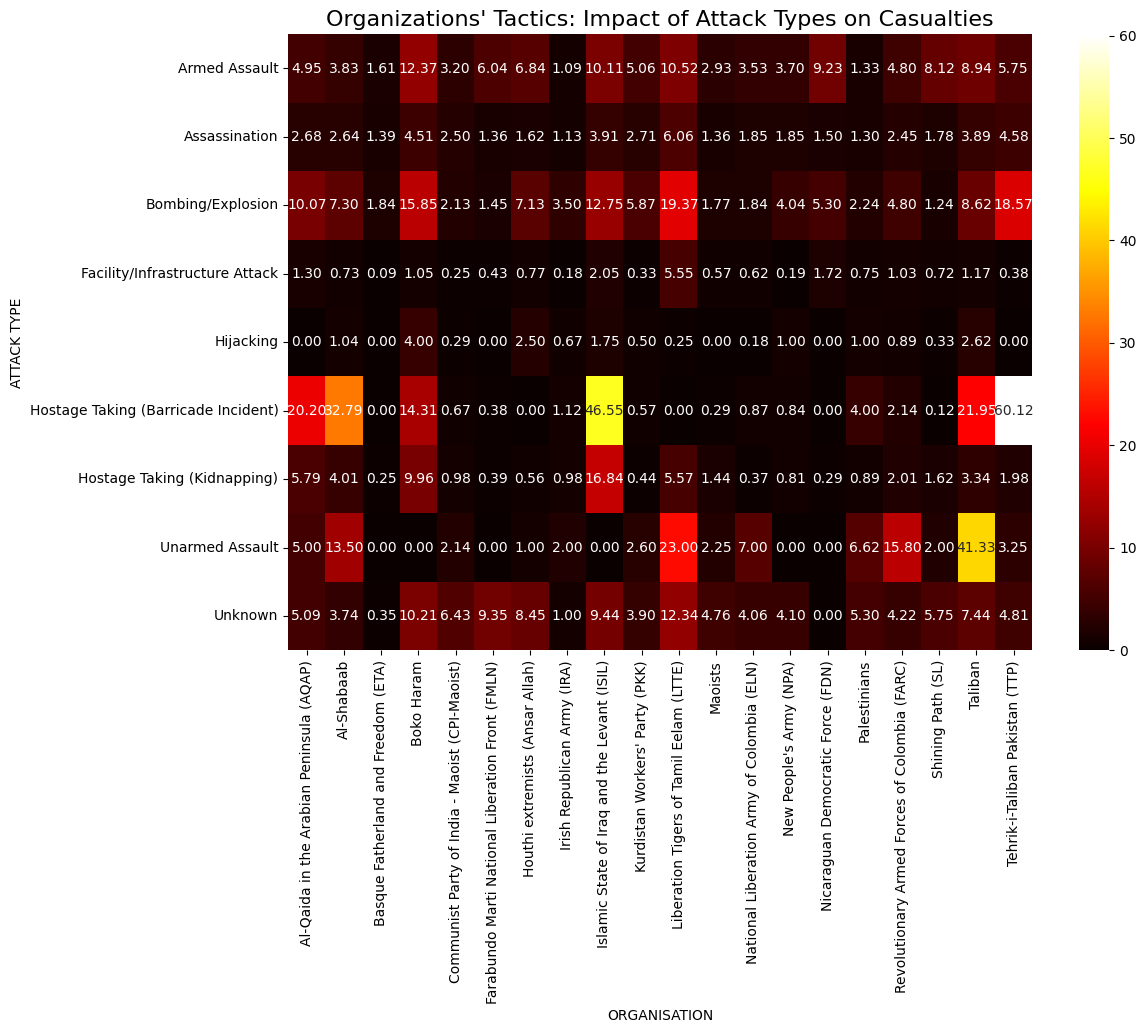

In [35]:
# Calculate 'casuality to attack ratio'
gtdata['casuality to attack ratio'] = gtdata['CASUALTY'] / gtdata['No.of attacks']

# Filter and process data for Attack Types
temp = gtdata[gtdata['ORGANISATION'].isin(top_orgs_by_attacks['ORGANISATION'])]
c_to_a_attack_type = temp.groupby(['ORGANISATION', 'ATTACK TYPE'])['casuality to attack ratio'].mean().reset_index()
c_to_a_attack_type = c_to_a_attack_type.sort_values('casuality to attack ratio', ascending=False)

# Pivot table for heatmap
c_to_a_attack_type_pivot = c_to_a_attack_type.pivot_table(index='ATTACK TYPE', columns='ORGANISATION', values='casuality to attack ratio').fillna(0)

# Plot heatmap for Attack Types
plt.figure(figsize=(12, 8))
plt.title("Organizations' Tactics: Impact of Attack Types on Casualties",fontsize = 16)
sns.heatmap(c_to_a_attack_type_pivot, cmap='hot', annot=True, fmt=".2f", annot_kws={'size': 10})
plt.show()


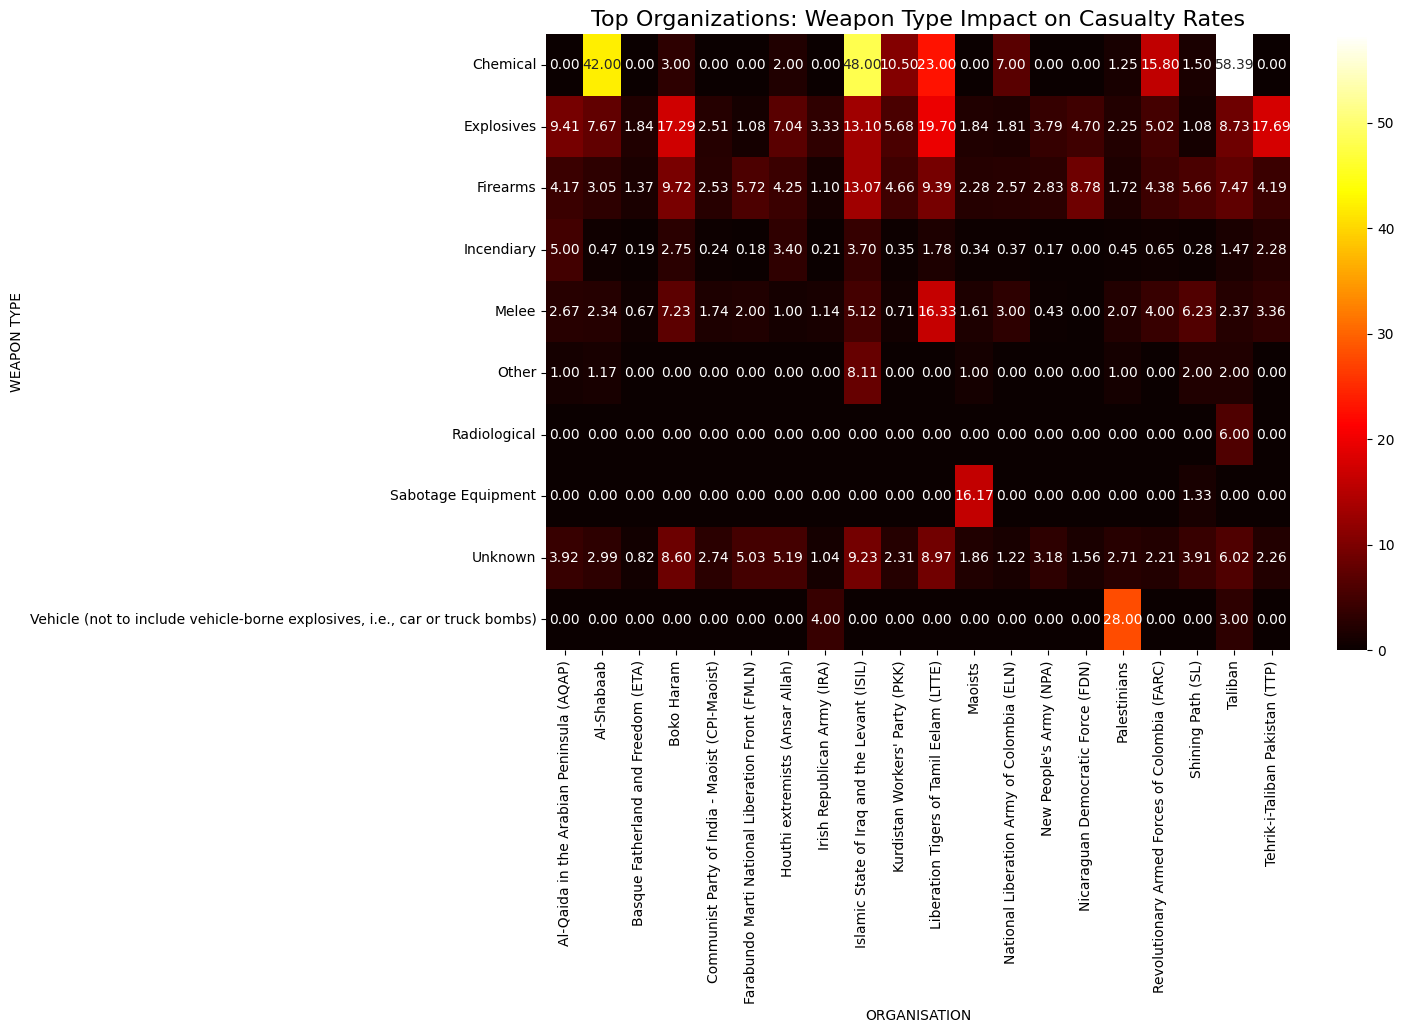

In [36]:
# Filter and process data for Weapon Types
c_to_a_weapon_type = temp.groupby(['ORGANISATION', 'WEAPON TYPE'])['casuality to attack ratio'].mean().reset_index()
c_to_a_weapon_type = c_to_a_weapon_type.sort_values('casuality to attack ratio', ascending=False)

# Pivot table for heatmap
c_to_a_weapon_type_pivot = c_to_a_weapon_type.pivot_table(index='WEAPON TYPE', columns='ORGANISATION', values='casuality to attack ratio').fillna(0)

# Plot heatmap for Weapon Types
plt.figure(figsize=(12, 8))
plt.title("Top Organizations: Weapon Type Impact on Casualty Rates", fontsize=16)
sns.heatmap(c_to_a_weapon_type_pivot, cmap='hot', annot=True, fmt=".2f", annot_kws={'size': 10})


plt.show()

REMARKS:

•	Highest casualty per attack of 60 was attained by TTP by hostage-taking (barricade incident) and those organization involved in hostage-taking (barricade incident) attained their highest casualty per attack in the same.

•	In the case of the most preferred attack type (bombing/ explosion), LTTE attained the highest value of 19


# 3. **Analysising organisation with respect to criteria**

In [37]:
#Treemap based on organisation & country the events where only criteria 1 and 2 follows
treemap=px.treemap(data_frame=gtdata[(gtdata.ORGANISATION!='Unknown')&(gtdata.crit1==1) & (gtdata.crit2==1) & (gtdata.crit3==0)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 1 and 2 follows',)
treemap.show()

#Treemap based on organisation & country the events where only criteria 1 and 3 follows
treemap=px.treemap(data_frame=gtdata[(gtdata.ORGANISATION!='Unknown')&(gtdata.crit1==1) & (gtdata.crit2==0) & (gtdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 1 and 3 follows',)
treemap.show()

#Treemap based on organisation & country the events where only criteria 2 and 3 follows
treemap=px.treemap(data_frame=gtdata[(gtdata.ORGANISATION!='Unknown')&(gtdata.crit1==0) & (gtdata.crit2==1) & (gtdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 2 and 3 follows',)
treemap.show()

#Treemap based on organisation & country the events where only criteria 1,2 and 3 follows
treemap=px.treemap(data_frame=gtdata[(gtdata.ORGANISATION!='Unknown')&(gtdata.crit1==1) & (gtdata.crit2==1) & (gtdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where all criteria follows',)
treemap.show()

REMARKS:

Events were only criteria 1 & 2 follows,

    Farabundo Marti National Liberation Front (FMLN)-1220 attacks
    Al-Shabaab                                      -1185 attacks
    ISIL                                            -1147 attacks
    Taliban                                         -1077 attacks

Events were only criteria 1 & 3 follows,

    ISIL      - 38 attacks
    IRA       - 34 attacks
    Hezbollah - 32 attacks
    CPI-Maoist- 26 attacks

Events were only criteria 2 & 3 follows,

    Gunmen           - 72 attacks
    Fulani extremist - 16 attacks
    Narco terrorists - 12 attacks
    New People’s Army- 12 attacks

Events were all criterias follows,

    Taliban                                         -6394 attacks
    ISIL                                            -4425 attacks
    Shinning Path(SL)                               -4142 attacks
    Boko Haram                                      -2170 attacks




#4. **Analysising most affected regions i.e, Middle East & North Africa and South Asia**

In [38]:
gtdata_me=gtdata[gtdata.REGION=='Middle East & North Africa']#For Middle East & North Africa
gtdata_sa=gtdata[gtdata.REGION=='South Asia']#For Middle East & North Africa
gtdata_rest=gtdata[(gtdata.REGION!='Middle East & North Africa')&(gtdata.REGION!='South Asia')]#For rest of the world
organisation_data_me=gtdata_me.groupby('ORGANISATION')['No.of attacks'].count().reset_index()
organisation_data_sa=gtdata_sa.groupby('ORGANISATION')['No.of attacks'].count().reset_index()

#Creating organisation data for Middle East & North Africa
organisation_data_me['Attack successful']=gtdata_me.groupby('ORGANISATION')['SUCCESS'].sum().reset_index()['SUCCESS']#Creating coloumn of successfull number of attacks
organisation_data_me['No.of attacks percentage']=organisation_data_me['No.of attacks']*100/gtdata_me['No.of attacks'].count()#Creating coloumn  number of attacks percentage
organisation_data_me['Success percentage']=organisation_data_me['Attack successful']*100/organisation_data_me['No.of attacks']#Creating coloumn of successfull number of attacks percentage
organisation_data_me['CASUALTIES']=gtdata_me.groupby('ORGANISATION')['CASUALTY'].sum().reset_index()['CASUALTY']#Creating coloumn of  number of casualty
organisation_data_me['CASUALTIES PERCENTAGE']=organisation_data_me['CASUALTIES']*100/gtdata_me['CASUALTY'].sum()#Creating coloumn of  casualty percentage
organisation_data_me['Casuality to Attack ratio']=organisation_data_me['CASUALTIES']/organisation_data_me['No.of attacks']#Creating coloumn of  casualty to attack ratio
mej=organisation_data_me.sort_values(by='No.of attacks percentage',ascending=False)#creating a temp dataframe for further use

#Creating organisation data for South Asia
organisation_data_sa['Attack successful']=gtdata_sa.groupby('ORGANISATION')['SUCCESS'].sum().reset_index()['SUCCESS']#Creating coloumn of successfull number of attacks
organisation_data_sa['No.of attacks percentage']=organisation_data_sa['No.of attacks']*100/gtdata_sa['No.of attacks'].count()#Creating coloumn  number of attacks percentage
organisation_data_sa['Success percentage']=organisation_data_sa['Attack successful']*100/organisation_data_sa['No.of attacks']#Creating coloumn of successfull number of attacks percentage
organisation_data_sa['CASUALTIES']=gtdata_sa.groupby('ORGANISATION')['CASUALTY'].sum().reset_index()['CASUALTY']#Creating coloumn of  number of casualty
organisation_data_sa['CASUALTIES PERCENTAGE']=organisation_data_sa['CASUALTIES']*100/gtdata_sa['CASUALTY'].sum()#Creating coloumn of  casualty percentage
organisation_data_sa['Casuality to Attack ratio']=organisation_data_sa['CASUALTIES']/organisation_data_sa['No.of attacks']#Creating coloumn of  casualty to attack ratio
saj=organisation_data_sa.sort_values(by='No.of attacks percentage',ascending=False)#creating a temp dataframe for further use

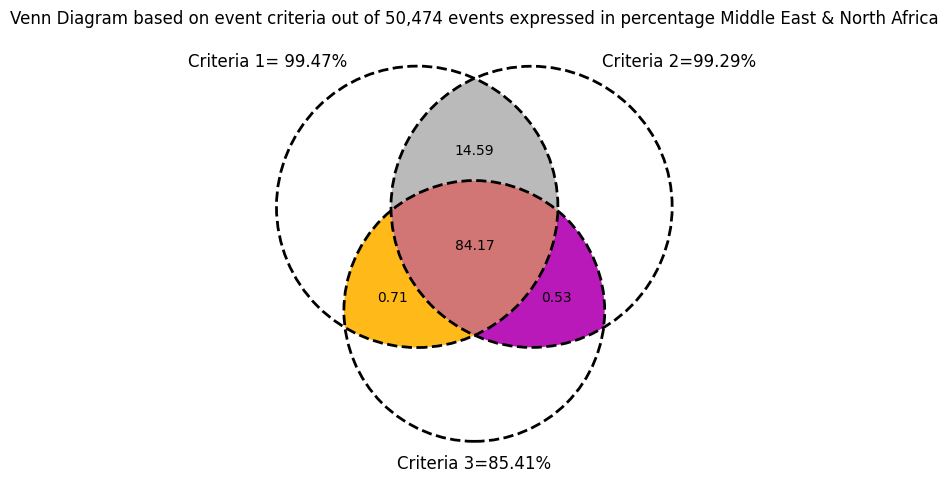

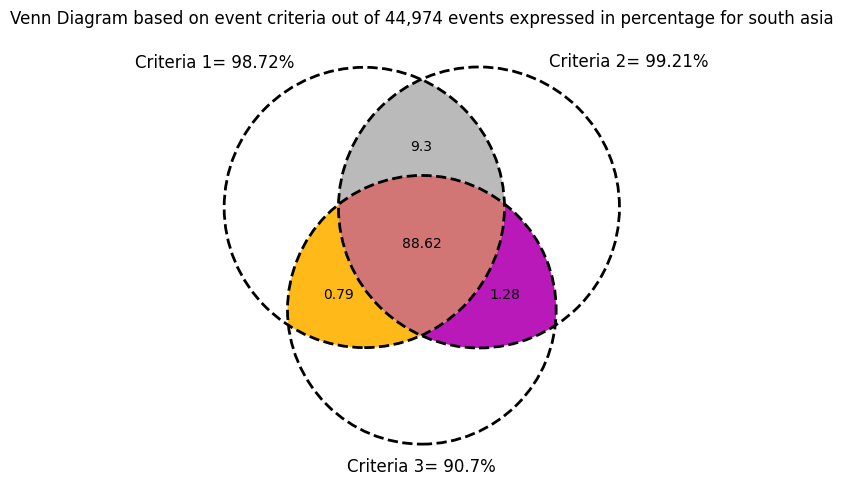

In [40]:
#Venn Diagram based on event criteria out of 50,474 events expressed in percentage Middle East & North Africa
crit1=round(gtdata_me[(gtdata_me.crit1==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1

crit2=round(gtdata_me[(gtdata_me.crit2==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 2

crit3=round(gtdata_me[(gtdata_me.crit3==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 3

all_crit=round(gtdata_me[(gtdata_me.crit1==1) & (gtdata_me.crit2==1) & (gtdata_me.crit3==1)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER ALL CRITERIA

crit_1_2=round(gtdata_me[(gtdata_me.crit1==1) & (gtdata_me.crit2==1) & (gtdata_me.crit3==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1 & CRITERIA 2

crit_1_3=round(gtdata_me[(gtdata_me.crit1==1) & (gtdata_me.crit3==1) & (gtdata_me.crit2==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1 & CRITERIA 3

crit_2_3=round(gtdata_me[(gtdata_me.crit2==1) & (gtdata_me.crit3==1) & (gtdata_me.crit1==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 2 & CRITERIA 3
plt.figure(figsize=(6, 8))
v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,all_crit),
      set_labels=('Criteria 1= 99.47%', 'Criteria 2=99.29%', 'Criteria 3=85.41%'),
      set_colors=("Yellow", "blue", "red"), alpha=0.9)
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,all_crit),
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 50,474 events expressed in percentage Middle East & North Africa")

plt.show()







#Venn Diagram based on event criteria out of 44,974 events expressed in percentage for south asia
crit1=round(gtdata_sa[(gtdata_sa.crit1==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1

crit2=round(gtdata_sa[(gtdata_sa.crit2==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 2

crit3=round(gtdata_sa[(gtdata_sa.crit3==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 3


all_crit=round(gtdata_sa[(gtdata_sa.crit1==1) & (gtdata_sa.crit2==1) & (gtdata_sa.crit3==1)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER ALL CRITERIA
crit_1_2=round(gtdata_sa[(gtdata_sa.crit1==1) & (gtdata_sa.crit2==1) & (gtdata_sa.crit3==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1 & CRITERIA 2
crit_1_3=round(gtdata_sa[(gtdata_sa.crit1==1) & (gtdata_sa.crit3==1) & (gtdata_sa.crit2==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1 & CRITERIA 3
crit_2_3=round(gtdata_sa[(gtdata_sa.crit2==1) & (gtdata_sa.crit3==1) & (gtdata_sa.crit1==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 2 & CRITERIA 3
plt.figure(figsize=(6, 8))
v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,all_crit),
      set_labels=('Criteria 1= 98.72%', 'Criteria 2= 99.21%', 'Criteria 3= 90.7%'),
      set_colors=("yellow", "blue", "red"), alpha=0.9)#Venn diagram
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,all_crit),
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 44,974 events expressed in percentage for south asia")

plt.show()

REMARKS:

Considering event inclusion criteria,

99.47 % of events in Middle East & North Africa and 98.72 % of events in South Asia aimed at attaining a political, economic, religious, or social goal with an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims.

And moreover 84 % of events in Middle East & North Africa and 88.62 % of events in South Asia had all the criteria followed

In [43]:
# Creating year wise stats pertaining to Middle East and North Africa
temp_me=gtdata_me.groupby('YEAR')['No.of attacks'].count().reset_index()
df_me=temp_me.iloc[1: , :].reset_index()
df_me['previous year']=temp_me['No.of attacks']
df_me['PERCENTAGE CHANGE']=(df_me['No.of attacks']-df_me['previous year'])*100/df_me['previous year']
a=df_me['PERCENTAGE CHANGE'].sum()/df_me['PERCENTAGE CHANGE'].count()
print(f'Average percentage change when considering Middle East and North Africa is {round(a,2)}')
df_me['YEAR'] = df_me["YEAR"].map(str)


# Creating year wise stats pertaining to South Asia
temp_sa=gtdata_sa.groupby('YEAR')['No.of attacks'].count().reset_index()
df_sa=temp_sa.iloc[1: , :].reset_index()
df_sa['previous year']=temp_sa['No.of attacks']
df_sa['PERCENTAGE CHANGE']=(df_sa['No.of attacks']-df_sa['previous year'])*100/df_sa['previous year']
a=df_sa['PERCENTAGE CHANGE'].sum()/df_sa['PERCENTAGE CHANGE'].count()
print(f'Average percentage change when considering South Asia is {round(a,2)}')
df_sa['YEAR'] = df_sa["YEAR"].map(str)

# Creating year wise stats pertaining to Rest of the world
temp_rest=gtdata_rest.groupby('YEAR')['No.of attacks'].count().reset_index()
df_rest=temp_rest.iloc[1: , :].reset_index()
df_rest['previous year']=temp_rest['No.of attacks']
df_rest['PERCENTAGE CHANGE']=(df_rest['No.of attacks']-df_rest['previous year'])*100/df_rest['previous year']
a=df_rest['PERCENTAGE CHANGE'].sum()/df_rest['PERCENTAGE CHANGE'].count()
print(f'Average percentage change when considering rest the world is {round(a,2)}')
df_rest['YEAR'] = df_rest["YEAR"].map(str)


# Creating year wise stats pertaining to for all the above three regions
stats_data=df_me
stats_data.rename(columns = {'No.of attacks':'No.of attacks ME','previous year':'previous year ME','PERCENTAGE CHANGE':'PERCENTAGE CHANGE ME'}, inplace = True)
stats_data['No.of attacks sa']=df_sa['No.of attacks']
stats_data['previous year sa']=df_sa['previous year']
stats_data['PERCENTAGE CHANGE SA']=df_sa['PERCENTAGE CHANGE']
stats_data['No.of attacks rest']=df_rest['No.of attacks']
stats_data['previous year rest']=df_rest['previous year']
stats_data['PERCENTAGE CHANGE REST']=df_rest['PERCENTAGE CHANGE']


# Creating bar plot w.r.t percentage change
change_wise=px.bar(data_frame=stats_data,y=['PERCENTAGE CHANGE ME','PERCENTAGE CHANGE SA','PERCENTAGE CHANGE REST'],x='YEAR',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS')
change_wise.show()
# Creating bar plot w.r.t number of attacks
change_wise=px.bar(data_frame=stats_data,y=['No.of attacks ME','No.of attacks sa','No.of attacks rest'],x='YEAR',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS')
change_wise.show()

Average percentage change when considering Middle East and North Africa is 24.98
Average percentage change when considering South Asia is 63.8
Average percentage change when considering rest the world is 9.62


REMARKS:

In the case of the Middle East & North Africa,

•	The highest number of events happened in the year 2014(6939 events) and the minimum in 1973(19 events)
•	The highest percentage change was witnessed in the year 1977 (284%) and the lowest in the year 1973 (-64%)


In the case of South Asia,

•	The highest number of events happened in the year 2013(4998 events) and did not witness any event till 1977

•	The highest percentage change was witnessed in the year 1978 (1600%) and the minimum in the year 1997 (-72%)

**The overall average percentage change for the Middle East & North Africa is    25% and that of South Asia is 63% as compared to the global average of 10%**


In [44]:
#Pie diagram on number of attacks in top affected regions
Me=pd.DataFrame(gtdata_me.groupby('COUNTRY')['No.of attacks'].count().reset_index())#For Middle East & North Africa
Me_pie=px.pie(Me, values='No.of attacks',names='COUNTRY',title='TOTAL NUMBER OF ATTACKS IN THE MIDDLE EAST & NORTH AFRICA REGION COUNTRY WISE')
Me_pie.update_traces(textposition='inside', textinfo='percent+label')
Me_pie.show()
Sa=pd.DataFrame(gtdata_sa.groupby('COUNTRY')['No.of attacks'].count().reset_index())#For South asia
Sa_pie=px.pie(Sa, values='No.of attacks',names='COUNTRY',title='TOTAL NUMBER OF ATTACKS IN THE SOUTH ASIAN REGION COUNTRY WISE')
Sa_pie.update_traces(textposition='inside', textinfo='percent+label')
Sa_pie.show()

REMARKS:

•	While considering events in the Middle East & North Africa around 50% of events happened in Iraq.

•	In the case of South Asia Pakistan (32%), Afghanistan (28.3%) and India (26.6%) together constitute 87% of total events.


In [45]:
#pie chart on target type for Middle East & North Africa
target_type_piechart=px.pie(gtdata_me.groupby('TARGET TYPE')['CASUALTY'].sum().reset_index(),
          values='CASUALTY',
          names='TARGET TYPE',
          title='Total number of attacks interms of target type Middle East & North Africa')
target_type_piechart.show()

#pie chart on target type for South Asia
target_type_piechart=px.pie(gtdata_sa.groupby('TARGET TYPE')['CASUALTY'].sum().reset_index(),
          values='CASUALTY',
          names='TARGET TYPE',
          title='Total number of attacks interms of target type South Asia')
target_type_piechart.show()

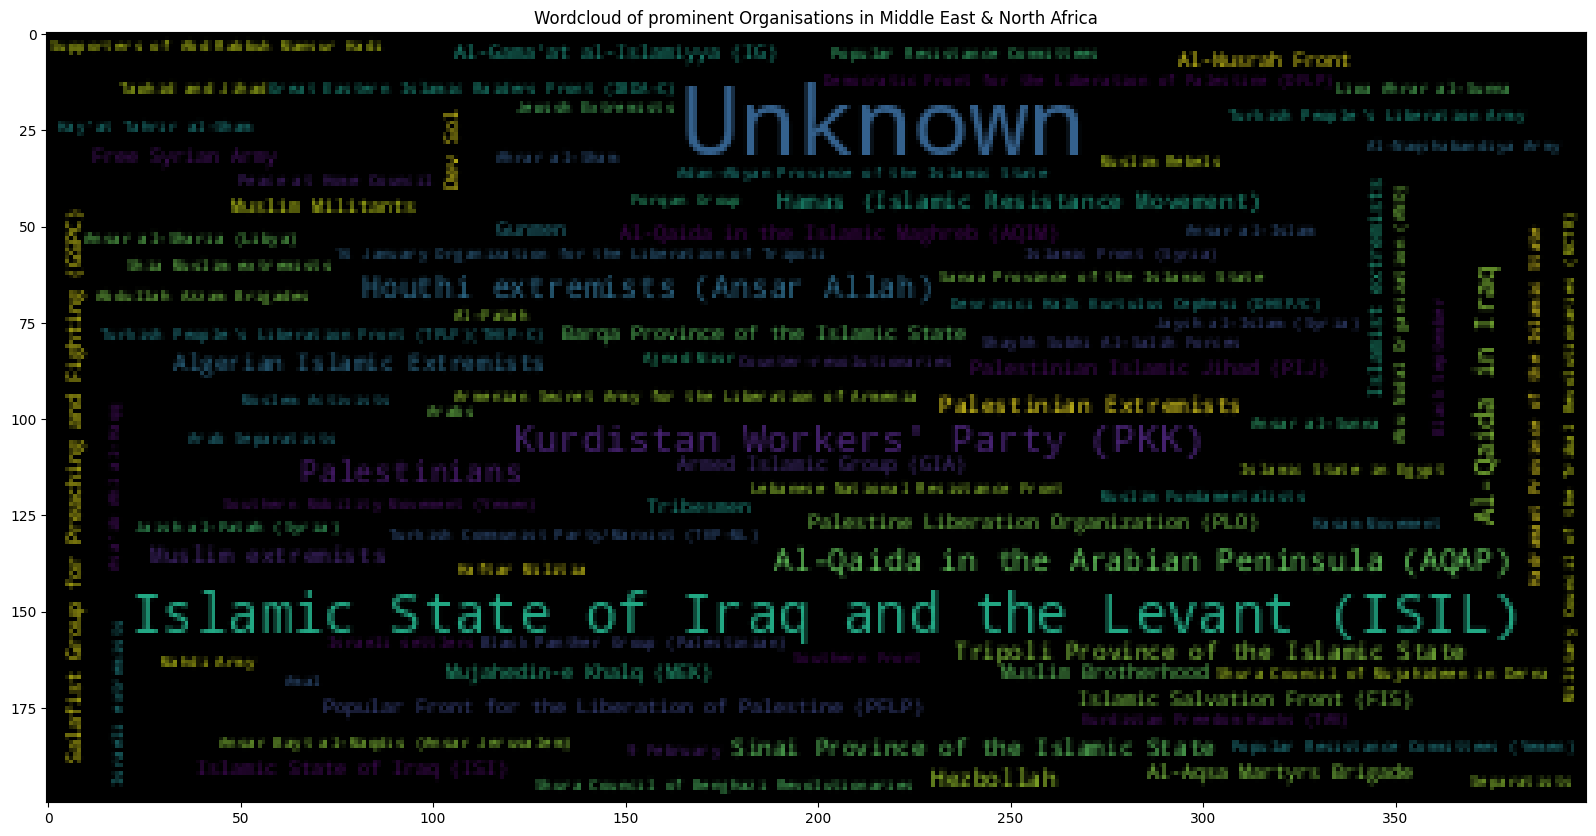

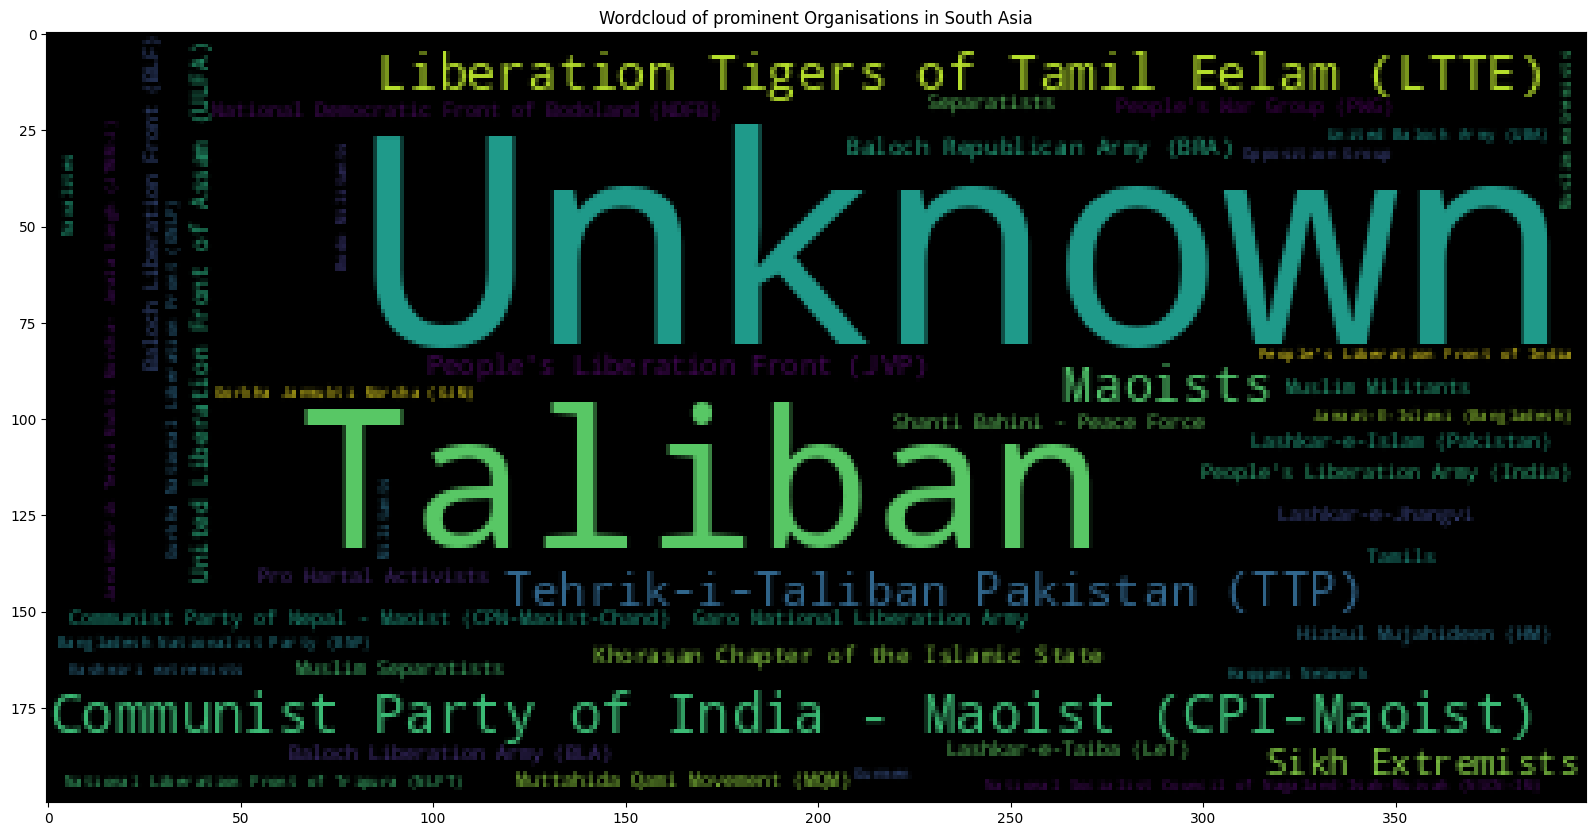

In [47]:
#Wordcloud of prominent Organisations in Middle East & North Africa
global_organisation_dict_me={}
for group,attacks in zip(organisation_data_me.ORGANISATION,organisation_data_me['No.of attacks']):
  global_organisation_dict_me[group]=attacks

wordcloud = WordCloud(background_color='black',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict_me) #using the dictionary created earlier
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of prominent Organisations in Middle East & North Africa')
plt.axis("on")
plt.show()

#Wordcloud of prominent Organisations in South Asia
global_organisation_dict_sa={}
for group,attacks in zip(organisation_data_sa.ORGANISATION,organisation_data_sa['No.of attacks']):
  global_organisation_dict_sa[group]=attacks

wordcloud = WordCloud(background_color='black',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict_sa) #using the dictionary created earlier
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of prominent Organisations in South Asia')
plt.axis("on")
plt.show()

In [51]:
#Top 20 organisation in Middle East and North Africa
organisation_data_top_20_me=mej.sort_values(by='No.of attacks percentage',ascending=False).head(10).reset_index(drop=True)
organisation_data_top_20_me.index+=1
display(organisation_data_top_20_me)
#Treemap based on organisation and country  in terms of number of attacks
treemap=px.treemap(data_frame=gtdata_me,
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation and country in terms of number of attacks')
treemap.show()




#Top 20 organisation in South Asia
organisation_data_top_20_sa=saj.sort_values(by='No.of attacks percentage',ascending=False).head(10).reset_index(drop=True)
organisation_data_top_20_sa.index+=1
display(organisation_data_top_20_sa)
#Treemap based on organisation and country in terms of number of attacks
treemap=px.treemap(data_frame=gtdata_sa,
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY',],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation and country in terms of number of attacks')
treemap.show()

ORGANISATION  No.of attacks  \
1                                       Unknown          29377   
2   Islamic State of Iraq and the Levant (ISIL)           5563   
3                Kurdistan Workers' Party (PKK)           2137   
4                                  Palestinians           1105   
5               Houthi extremists (Ansar Allah)           1062   
6      Al-Qaida in the Arabian Peninsula (AQAP)           1017   
7                              Al-Qaida in Iraq            637   
8           Sinai Province of the Islamic State            445   
9                        Palestinian Extremists            440   
10          Hamas (Islamic Resistance Movement)            407   

    Attack successful  No.of attacks percentage  Success percentage  \
1               25676                 58.202243           87.401709   
2                4711                 11.021516           84.684523   
3                2011                  4.233863           94.103884   
4                 886                  2.189246           80.180995   
5                 896                  2.104054           84.369115   
6                 899                  2.014899           88.397247   
7                 623                  1.262036           97.802198   
8                 399                  0.881642           89.662921   
9                 286                  0.871736           65.000000   
10                342                  0.806356           84.029484   

    CASUALTIES  CASUALTIES PERCENTAGE  Casuality to Attack ratio  
1     171310.0              48.674528                   5.831433  
2      68255.0              19.393380                  12.269459  
3       9827.0               2.792158                   4.598503  
4       2173.0               0.617417                   1.966516  
5       6484.0               1.842307                   6.105461  
6       6624.0               1.882086                   6.513274  
7      14721.0               4.182696                  23.109890  
8       2787.0               0.791874                   6.262921  
9        772.0               0.219349                   1.754545  
10      4017.0               1.141355                   9.869779

ORGANISATION  No.of attacks  \
1                                          Unknown          21913   
2                                          Taliban           7477   
3   Communist Party of India - Maoist (CPI-Maoist)           1878   
4                                          Maoists           1625   
5          Liberation Tigers of Tamil Eelam (LTTE)           1604   
6                  Tehrik-i-Taliban Pakistan (TTP)           1350   
7                                  Sikh Extremists            712   
8                  People's Liberation Front (JVP)            433   
9          United Liberation Front of Assam (ULFA)            357   
10           Khorasan Chapter of the Islamic State            343   

    Attack successful  No.of attacks percentage  Success percentage  \
1               18385                 48.723707           83.899968   
2                6679                 16.625161           89.327270   
3                1774                  4.175746           94.462194   
4                1304                  3.613199           80.246154   
5                1529                  3.566505           95.324190   
6                1267                  3.001734           93.851852   
7                 669                  1.583137           93.960674   
8                 413                  0.962778           95.381062   
9                 327                  0.793792           91.596639   
10                293                  0.762663           85.422741   

    CASUALTIES  CASUALTIES PERCENTAGE  Casuality to Attack ratio  
1      77481.0              31.927361                   3.535846  
2      57337.0              23.626684                   7.668450  
3       4009.0               1.651976                   2.134718  
4       3006.0               1.238673                   1.849846  
5      22020.0               9.073715                  13.728180  
6      15574.0               6.417531                  11.536296  
7       4627.0               1.906634                   6.498596  
8       1838.0               0.757379                   4.244804  
9       2772.0               1.142250                   7.764706  
10      4962.0               2.044676                  14.466472

In [56]:
#BAR PLOT OF ORGANISATION AND THERE SUCCESS PERCENTAGE (MIDDLE EAST AND NORTH AFRICA)
px.bar(data_frame=organisation_data_me[organisation_data_me.ORGANISATION!='Unknown'].sort_values(by='No.of attacks',ascending=False).head(10).sort_values(by='Success percentage',ascending=False),
                  width=1150,height=800,
                  x='Success percentage',y='ORGANISATION',
                  hover_data=['CASUALTIES'],color='Success percentage',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ORGANISATION AND THERE SUCCESS PERCENTAGE (MIDDLE EAST AND NORTH AFRICA')


In [59]:

#BAR PLOT OF ORGANISATION AND THERE SUCCESS PERCENTAGE (SOUTH ASIA)
px.bar(data_frame=organisation_data_sa[organisation_data_sa.ORGANISATION!='Unknown'].sort_values(by='No.of attacks',ascending=False).head(10).sort_values(by='Success percentage',ascending=False),
                  width=1150,height=800,
                  x='Success percentage',y='ORGANISATION',
                  hover_data=['CASUALTIES'],color='Success percentage',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ORGANISATION AND THERE SUCCESS PERCENTAGE (SOUTH ASIA)')


REMARKS:

In case of Middle East & North Africa,

    • ISIL had maximum attacks of 11% causing 68,255 casualties (19% of total casualties)

    • Al-Qaida in Iraq had the highest casualty to attack ratio of 23 (637 attacks and 14,721 casualties)

    • Al-Qaida in Iraq had the highest success percentage 97.8%

    • ISIL had the highest casualty of 68,255 with a success percentage of 84.6%



In case of South Asia,

    • Al-Qaida in Iraq had the highest success percentage 97.8%

    • ISIL had the highest casualty of 68,255 with a success percentage of 84.6%

    • People’s Liberation Front(JVP) and LTTE had the highest success percentage of 95.3%

    • Taliban with the highest casualty of 57,337



In [60]:
#pie chart on attack type
attack_type_piechart=px.pie(gtdata_me.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(),
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Total number of attacks interms of attack type in Middle East & North Africa')
attack_type_piechart.show()#Middle East & North Africa

attack_type_piechart=px.pie(gtdata_sa.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(),
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Total number of attacks interms of attack type in South Asia')
attack_type_piechart.show()# South Asia



#pie chart on weapon type
attack_type_piechart=px.pie(gtdata_me.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(),
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Total number of attacks interms of weapon type in Middle East & North Africa')
attack_type_piechart.show()#Middle East & North Africa
attack_type_piechart=px.pie(gtdata_sa.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(),
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Total number of attacks interms of weapon type in South Asia')
attack_type_piechart.show()#South Asia



REMARKS:

Bombing , armed assault followed by assassination is most preferred attack type in both regions as well as globally

In [62]:
#Treemap based on attack type and organisation in terms of number of attacks (Middle East & North Africa)
treemap=px.treemap(data_frame=gtdata_me[gtdata_me.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['ATTACK TYPE','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on attack type and organisation in terms of number of attacks (Middle East & North Africa)')
treemap.show()
#Treemap based on attack type and organisation in terms of number of attacks (South Asia)
treemap=px.treemap(data_frame=gtdata_sa[gtdata_sa.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['ATTACK TYPE','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on attack type and organisation in terms of number of attacks (South Asia)')
treemap.show()

Remarks:

In case of Middle East & North Africa,

    ISIL had highest number of attacks in bombing & hostage taking and PKK in armed assault & facility/infrastructure attacks.

In case of South Asia,


    Taliban had highest number of attacks in bombing, armed assault,hostage taking, assassination and hijacking

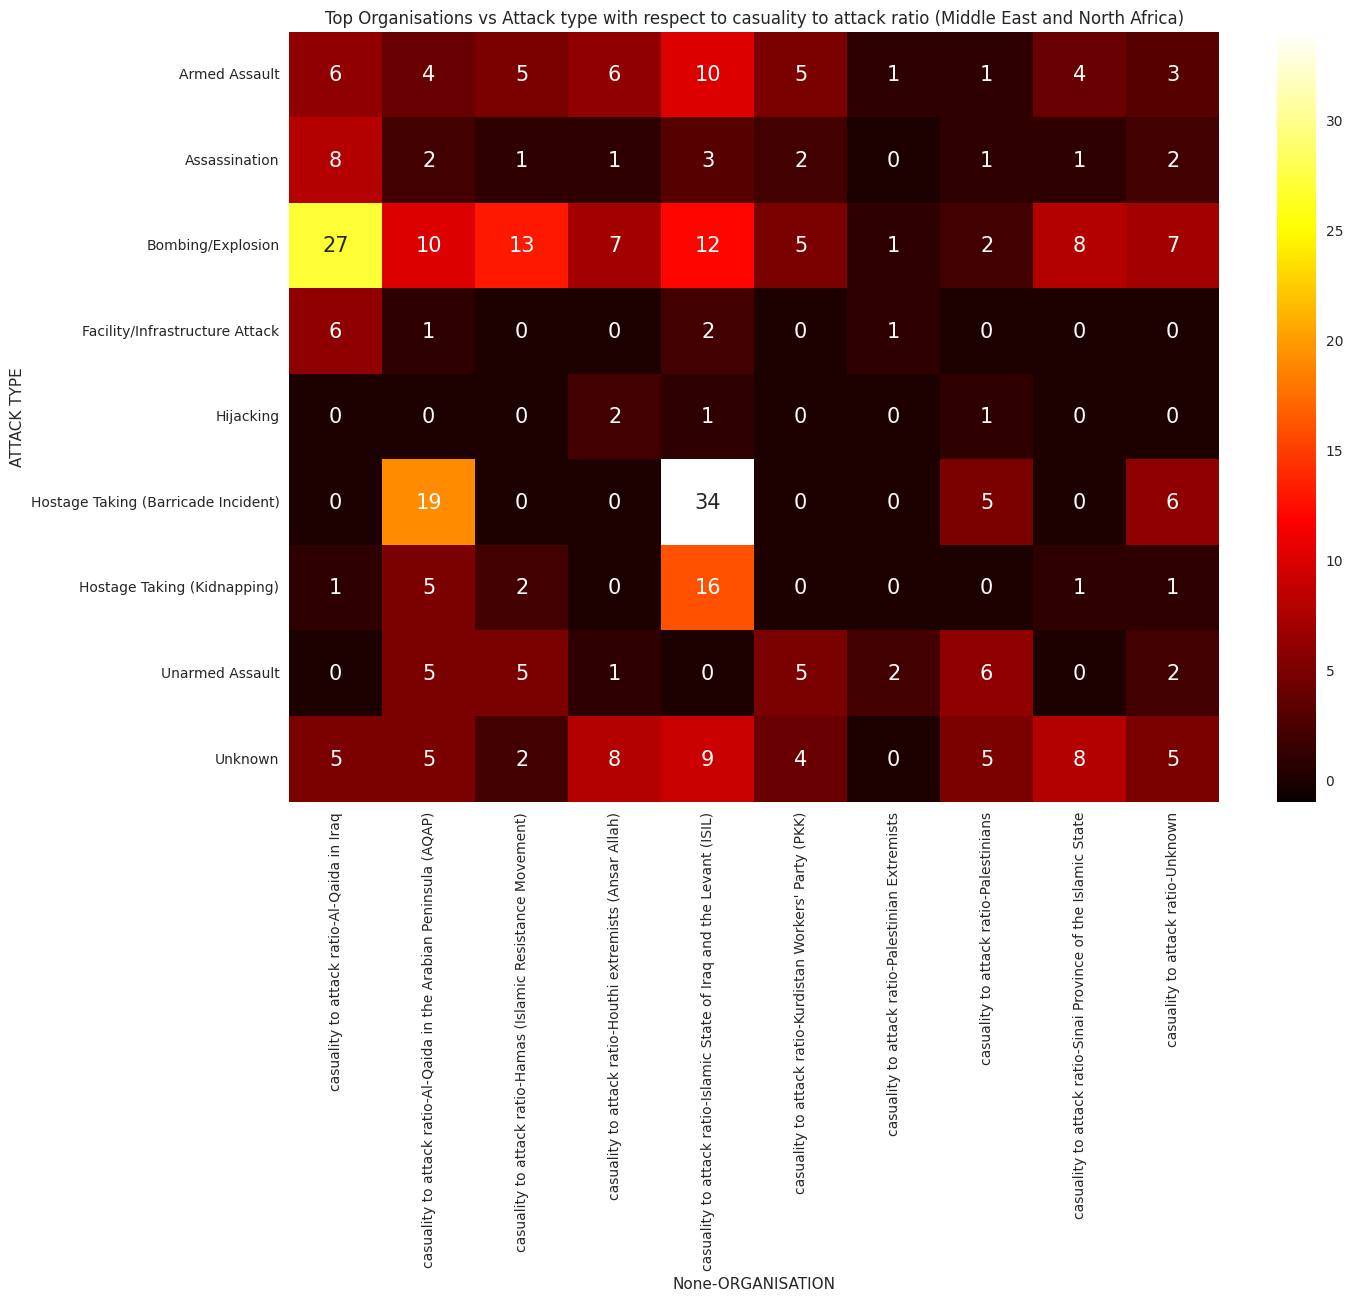

In [71]:
#Top  Organisations vs Attack type with respect to casuality to attack ratio (Middle East and North Africa)
temp=gtdata_me[gtdata_me['ORGANISATION'].isin(list(organisation_data_top_20_me['ORGANISATION']))]
temp.loc[:, 'casuality to attack ratio'] = temp['CASUALTY'] / temp['No.of attacks']
c_to_a_attack_type=temp.sort_values('No.of attacks',ascending=False)
#grouping the resulting df by organisation and weapon types
c_to_a_attack_type=c_to_a_attack_type.groupby(['ORGANISATION','ATTACK TYPE'])['casuality to attack ratio'].mean().reset_index()

#sorting the resulting df by casualty to attack ratio
c_to_a_attack_type.sort_values('casuality to attack ratio',ascending=False,inplace=True)

c_to_a_attack_type_pivot=c_to_a_attack_type.pivot_table(index='ATTACK TYPE',columns='ORGANISATION')
c_to_a_attack_type_pivot.fillna(0,inplace=True)
c_to_a_attack_type_pivot=c_to_a_attack_type_pivot.astype(int)

#generating heat map
colormap =sns.color_palette('hot', as_cmap=True)
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.title('Top Organisations vs Attack type with respect to casuality to attack ratio (Middle East and North Africa)')
sns.heatmap(c_to_a_attack_type_pivot, vmin=-1, cmap='hot', annot=True, fmt='d', annot_kws={'size':15})
plt.show()

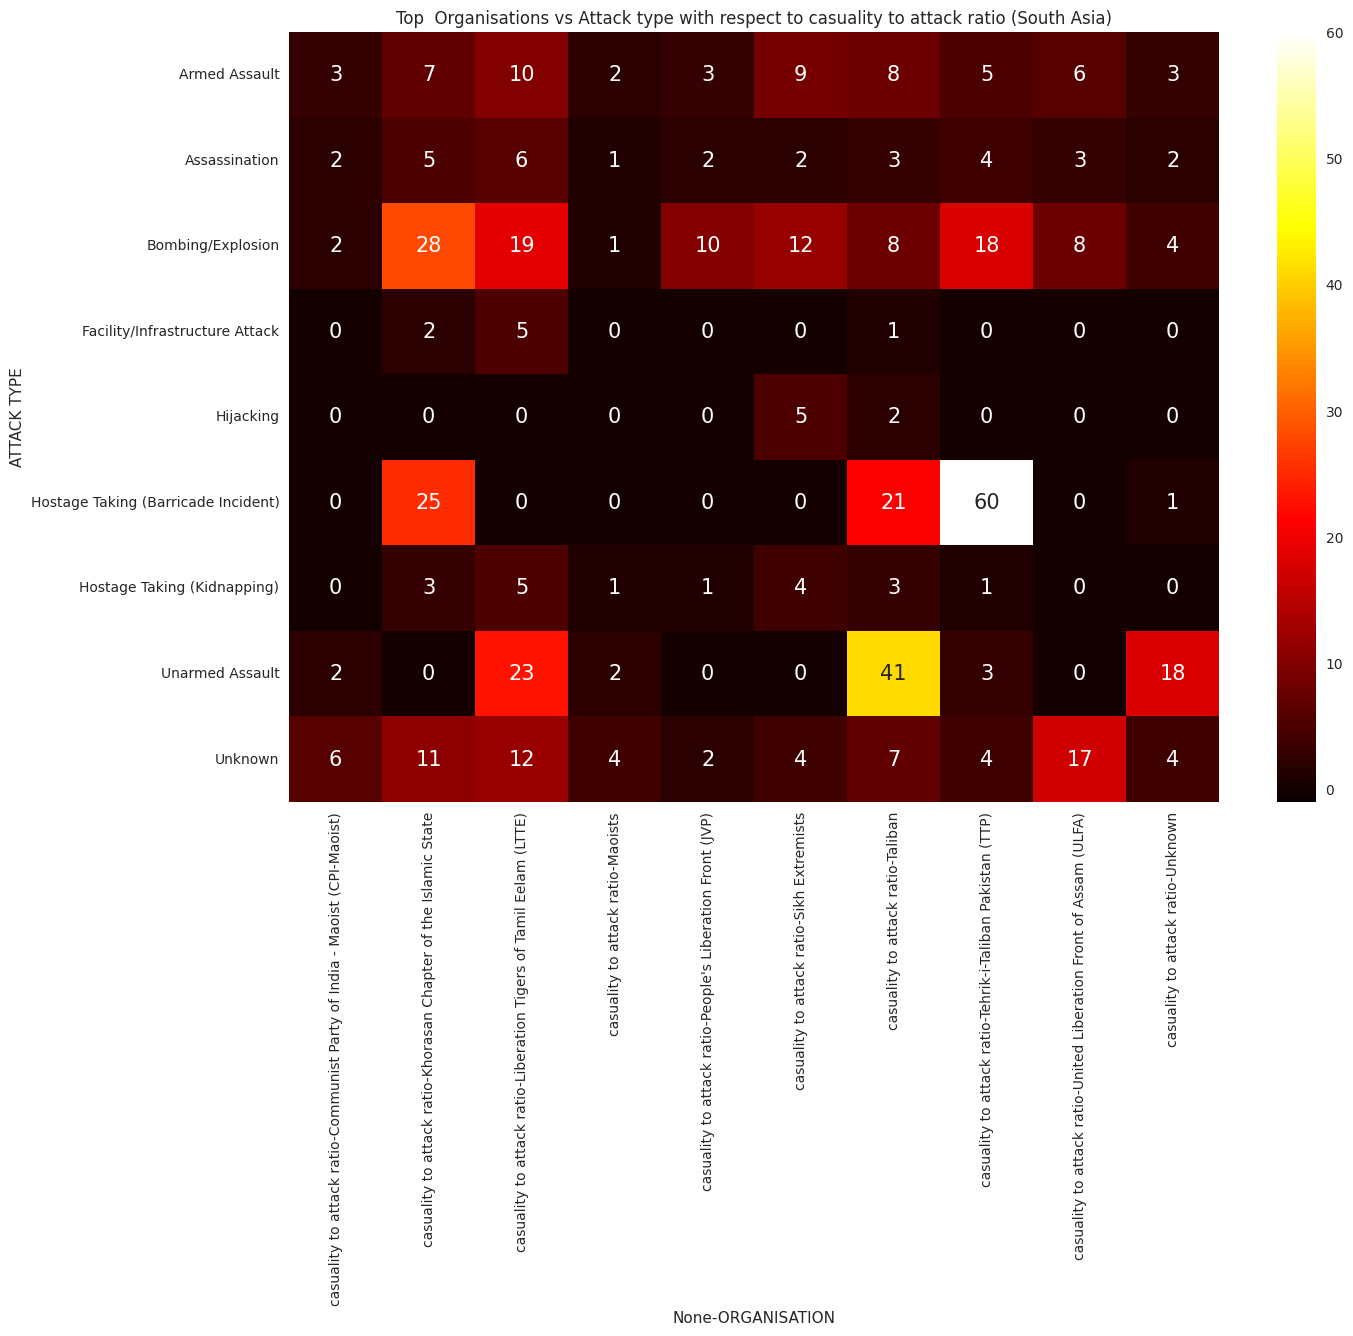

In [73]:
#Top  Organisations vs Attack type with respect to casuality to attack ratio (South Asia)
temp=gtdata_sa[gtdata_sa['ORGANISATION'].isin(list(organisation_data_top_20_sa['ORGANISATION']))]
temp.loc[:,'casuality to attack ratio']=temp['CASUALTY']/temp['No.of attacks']
c_to_a_attack_type=temp.sort_values('No.of attacks',ascending=False)
#grouping the resulting df by organisation and weapon types
c_to_a_attack_type=c_to_a_attack_type.groupby(['ORGANISATION','ATTACK TYPE'])['casuality to attack ratio'].mean().reset_index()

#sorting the resulting df by casualty to attack ratio
c_to_a_attack_type.sort_values('casuality to attack ratio',ascending=False,inplace=True)
c_to_a_attack_type_pivot=c_to_a_attack_type.pivot_table(index='ATTACK TYPE',columns='ORGANISATION')
c_to_a_attack_type_pivot.fillna(0,inplace=True)
c_to_a_attack_type_pivot=c_to_a_attack_type_pivot.astype(int)
#generating heat map
colormap =sns.color_palette('hot', as_cmap=True)
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.title('Top  Organisations vs Attack type with respect to casuality to attack ratio (South Asia)')
sns.heatmap(c_to_a_attack_type_pivot, vmin=-1, cmap=colormap, annot=True,fmt='d', annot_kws={'size':15})
plt.show()

REMARKS:

In the case of the Middle East & North  Africa,


    •ISIL in hostage-taking(Barricade incident) had the highest value of 34 in the case of the Middle East & North  Africa
    •In case of most preferred attack type i.e, bombing, Al-Qaida in Iraq had highest of 27.
    •ISIL and AQAP involved in 7 out of 8 attack types

In the case of the Middle East & North  Africa,


    • TTP in hostage-taking(Barricade incident) had the highest value of 60.
    • In case of most preferred attack type i.e, bombing, Khorasan chapter of Islamic state had highest value of 28.
    • Taliban involved in all attack types with highest value of 41 in unarmed Assault


# **Conclusion**

Conclusion:
The analysis of global terrorism for the year 2017 reveals several significant insights into the nature and patterns of terrorist activities worldwide. Here are the key findings:



*   Trend in Number of Attacks:
*   Geographical Distribution:
*   Types of Attacks:
*   Organizations Involved:
*   Casualties and Impact:
*   Success Rates and Strategies:
*   Emerging Trends:


Recommendations:
Based on the findings, recommendations include enhancing international cooperation, strengthening intelligence-sharing mechanisms, addressing root causes of extremism, and implementing targeted counterterrorism measures.

Overall, the analysis underscores the complex and multifaceted nature of global terrorism in 2017, emphasizing the need for comprehensive and collaborative approaches to mitigate this persistent threat and safeguard global security and peace.